# Importing Dataset & Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
# plt.style.use('seaborn-dark')
# plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [6]:
data = pd.read_csv('Data/MobilePrice/train.csv')
df=data.copy()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1206,0,3.0,1,10,1,30,0.6,127,3,...,1581,1713,1825,7,1,4,1,0,1,2
1596,832,1,0.5,1,1,1,5,0.1,165,5,...,9,1944,3946,12,5,14,1,1,1,3
1597,848,1,2.8,0,1,0,8,0.1,103,7,...,7,1294,436,10,6,15,1,1,1,0
1598,1851,0,2.9,0,0,0,53,0.7,112,6,...,174,1175,2678,6,0,8,1,0,0,2


In [8]:
test = pd.read_csv('Data/MobilePrice/test.csv')
df_test=test.copy()
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1776,1,2.1,1,10,0,35,0.1,172,...,16,278,623,1813,16,13,20,1,1,1
1,2,1254,1,1.2,0,2,1,27,0.2,134,...,10,1288,1372,817,14,1,16,1,1,1
2,3,1494,0,1.6,1,4,1,24,0.2,101,...,17,979,1190,3614,15,12,9,1,0,0
3,4,984,1,2.2,1,0,1,39,0.5,119,...,18,56,1931,2013,11,7,16,1,1,0
4,5,1179,1,0.8,0,1,0,5,0.9,154,...,17,913,1429,543,8,7,18,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,794,1,0.5,1,0,1,2,0.8,106,...,14,1222,1890,668,13,4,19,1,1,0
396,397,1965,1,2.6,1,0,0,39,0.2,187,...,3,915,1965,2032,11,10,16,1,1,1
397,398,1911,0,0.9,1,1,1,36,0.7,108,...,3,868,1632,3057,9,1,5,1,1,0
398,399,1512,0,0.9,0,4,1,46,0.1,145,...,5,336,670,869,18,10,19,1,1,1


# Processing

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_sc

In [11]:
!pip install summarytools

In [12]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,battery_power[int64],Mean (sd) : 1242.7 (439.1)min < med < max:501.0 < 1237.0 < 1998.0IQR (CV) : 765.8 (2.8),978 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAChklEQVR4nO3aT07bQBiG8W+aPxoSyVZIFHZcAKmLSNlwgC572B6hSCxYcwN2SFbkiJQojuOu6LKxxzHjFz2/dcZY8TPjD4SrqsqAvvsW+waAOobnPuCcuzKzceD1D1VVvQeuBf75b6jOuav5fP4zSZJZyMW32+3GOfcrNFY2CT6cO1HHSZLM7u/v39M03Te5cJ7n/vHxcZZl2djMGgcTe5OgX86++s3M0jTdL5fLPwHXvwpY8yHaJkH/1Ao1pkibBAG6HNV6HyqaiTXXdz2qEWrPtAzNX19f/0jTdBqyuOVc3+moRqg90vZUKorCm9nder1+WiwW2yZrLzXXdzWqEWq/BJ9KZmYvLy+z5+fnife++GpzfaehlmU5MrPEOReyPDmdTqML31JtMf+GG3oqbTabVqH1+Xl1FuputxsVRfH99vZ2MBgMGp8ORVH4sizv9vv9bzNr/NBafukxZ70oYj+vczoL9XA4DL33k9Vqtb+5udk0Xf/xGjsej4Omay/xpVuLWe/h4WGZZdnCOddorUV8i8R8XnV0PqNOp9NPf41d6ksPmfXabJKuT6U6YjyvOr70L1Nqm6TrU0nZlw41ppBN0vWppIz/R4UEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEYZ0P5Xnum1747e3Nm5ntdjv/+vo6+cz1qj9b9b7brq/T11/ln5NVU6vFQwAAAABJRU5ErkJggg=="">",0(0.0%)
2,blue[int64],Mean (sd) : 0.5 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (1.0),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABe0lEQVR4nO3XQWrCQBiG4ZkSRDcJIngYD9HD9hDeRsq4qFLQdNdNoWpU2g+eZz35mcXLhL+O41jgv3v56wvANbpLB2qti1LKbOL8z3EcDxO/hW+/hlprXaxWq9e+75dThu/3+/da65tYudelF3XW9/1ys9kchmE43jK4tTbfbrfL3W43K6UIlbtc/PWXUsowDMf1ev0xYf5iwjfwg2WKCFe9qHCNZy7eQuUhnr14C5VHeeriLVQe6lmLt2WKCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJUJ3zaHW2vzWwa21+el06kopfa315osRpz+fz93UVi6d+QIPJk59c6QHQwAAAABJRU5ErkJggg=="">",0(0.0%)
3,clock_speed[float64],Mean (sd) : 1.5 (0.8)min < med < max:0.5 < 1.5 < 3.0IQR (CV) : 1.5 (1.9),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjklEQVR4nO3dT27aQBiH4W9KQAYkI5QIdlygUhcsOUQP2yMUiRNwA3ZIFjLCjQUYuko3TfkzU2P/zPusMzYjvZkZlEjjzuezAXX3peoPANzi5doPOOe6ZtbxfP7+fD6/e44F/rgYqnOu+/r6+j2O46HPw7fb7cY594NYEeraitqJ43g4m83eB4NBfs+D0zSNFovFMEmSjpkRKoJc3frNzAaDQT4ajX55PL/rMQb4C1+mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIeGme6bwOIFXepo19FpPQv2HKu6ADb3S06y513oS6icqvAPW+0pPs/BrPeu8mhPq5yq9AzbgSk8zz2s9676aE+oFT3YHbPBqPp/PR0mSvDnnth7vv7ga1zrUKs6Jz873lzPLsvbhcPg2mUxarVbr7tCvrca1DbXCcyI87Pf7lyiKetPpNB+Px5t7xt5yXKptqBZ4TgzchuLT6dT2GFe5oijaZhY75+4d+l/m3O/3Szku1TlUM/PbikK3ocPhEBVF8TXP859m5vul5uFC5l33Odc+VB8h25CZ2Wq1Gi6Xy97xeGz5vL+qVS1k3qFzLlsjQ/3guw1tNhvvb+11WNV85h0y50coNdSAlcVM9JzY5FWtSqWF+qznxA9NXNWqVFqoVZ8T0Syln1GrOCeiefh/VEggVEggVEggVEggVEggVEggVEggVEggVEi46S9TaZpG9z54t9tFZmZZlkXr9br3yPGq71b93KHjb+nrN0AUtpRgM+ihAAAAAElFTkSuQmCC"">",0(0.0%)
4,dual_sim[int64],Mean (sd) : 0.5 (0.5)min < med < max:0.0 < 1.0 < 1.0IQR (CV) : 1.0 (1.0),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABdklEQVR4nO3YQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVCloegJrIhX7yfNsZ/4wi3dCSB2GocB/9/bsA8AYs2cfgNdRa12WUuZ3jn8Pw3C8tihU/kStdbler9+7rlvdM384HD5rrR/XYr0Z6iNvCS9l3nXdarvdHvu+P00ZbK0tdrvdar/fz0sp00N99C3h9fR9f9psNl93jC5/W7z1Rn3oLYGxRn2jPuqWwFh+TxFBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgS

We can see statistical information on the table above.

There are 21 columns & 2000 rows in this dataset and our target is price range.


Dataset as 21 features and 2000 entries. The meanings of the features are given below.

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [13]:
df.describe()[1:].T.style.background_gradient(cmap='magma', axis=1)

,mean,std,min,25%,50%,75%,max
battery_power,1242.733125,439.133809,501.000000,852.000000,1237.000000,1617.750000,1998.000000
blue,0.481875,0.499828,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,1.519875,0.816592,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,0.508125,0.500090,0.000000,0.000000,1.000000,1.000000,1.000000
fc,4.294375,4.347791,0.000000,1.000000,3.000000,7.000000,18.000000
four_g,0.515625,0.499912,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,32.371875,18.124159,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,0.500687,0.286980,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,140.810625,35.293743,80.000000,109.750000,142.000000,171.000000,200.000000
n_cores,4.511250,2.304223,1.000000,3.000000,4.000000,7.000000,8.000000


In [14]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


There is no duplicate raw or NaN data.

In [15]:
# Finding unique data

df.apply(lambda x: len(x.unique()))

battery_power     978
blue                2
clock_speed        26
dual_sim            2
fc                 19
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1003
px_width          987
ram              1307
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [16]:
df.ram.value_counts()

ram
1229    4
1464    4
2227    4
2832    3
1303    3
       ..
3595    1
1726    1
3952    1
850     1
3887    1
Name: count, Length: 1307, dtype: int64

In [17]:
df.blue.value_counts()
print('\n 1 there is bluetooth=',df.blue.value_counts()[0],"\n",
      '0 there is not bluetooth=',df.blue.value_counts()[1])


 1 there is bluetooth= 829 
 0 there is not bluetooth= 771


In [18]:
df.dual_sim.value_counts()
print('\n 1 there is dual sim=',df.dual_sim.value_counts()[0],"\n",
      '0 there is not dual sim=',df.dual_sim.value_counts()[1])


 1 there is dual sim= 787 
 0 there is not dual sim= 813


In [19]:
df.four_g.value_counts()
print('\n 0 there is 4G =',df.four_g.value_counts()[0],"\n",
      '1 there is not 4G=',df.four_g.value_counts()[1])


 0 there is 4G = 775 
 1 there is not 4G= 825


In [20]:
df.three_g.value_counts()
print('\n 0 there is not 3G =',df.three_g.value_counts()[0],"\n",
      '1 there is 3G=',df.three_g.value_counts()[1])


 0 there is not 3G = 383 
 1 there is 3G= 1217


In [21]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Visualization

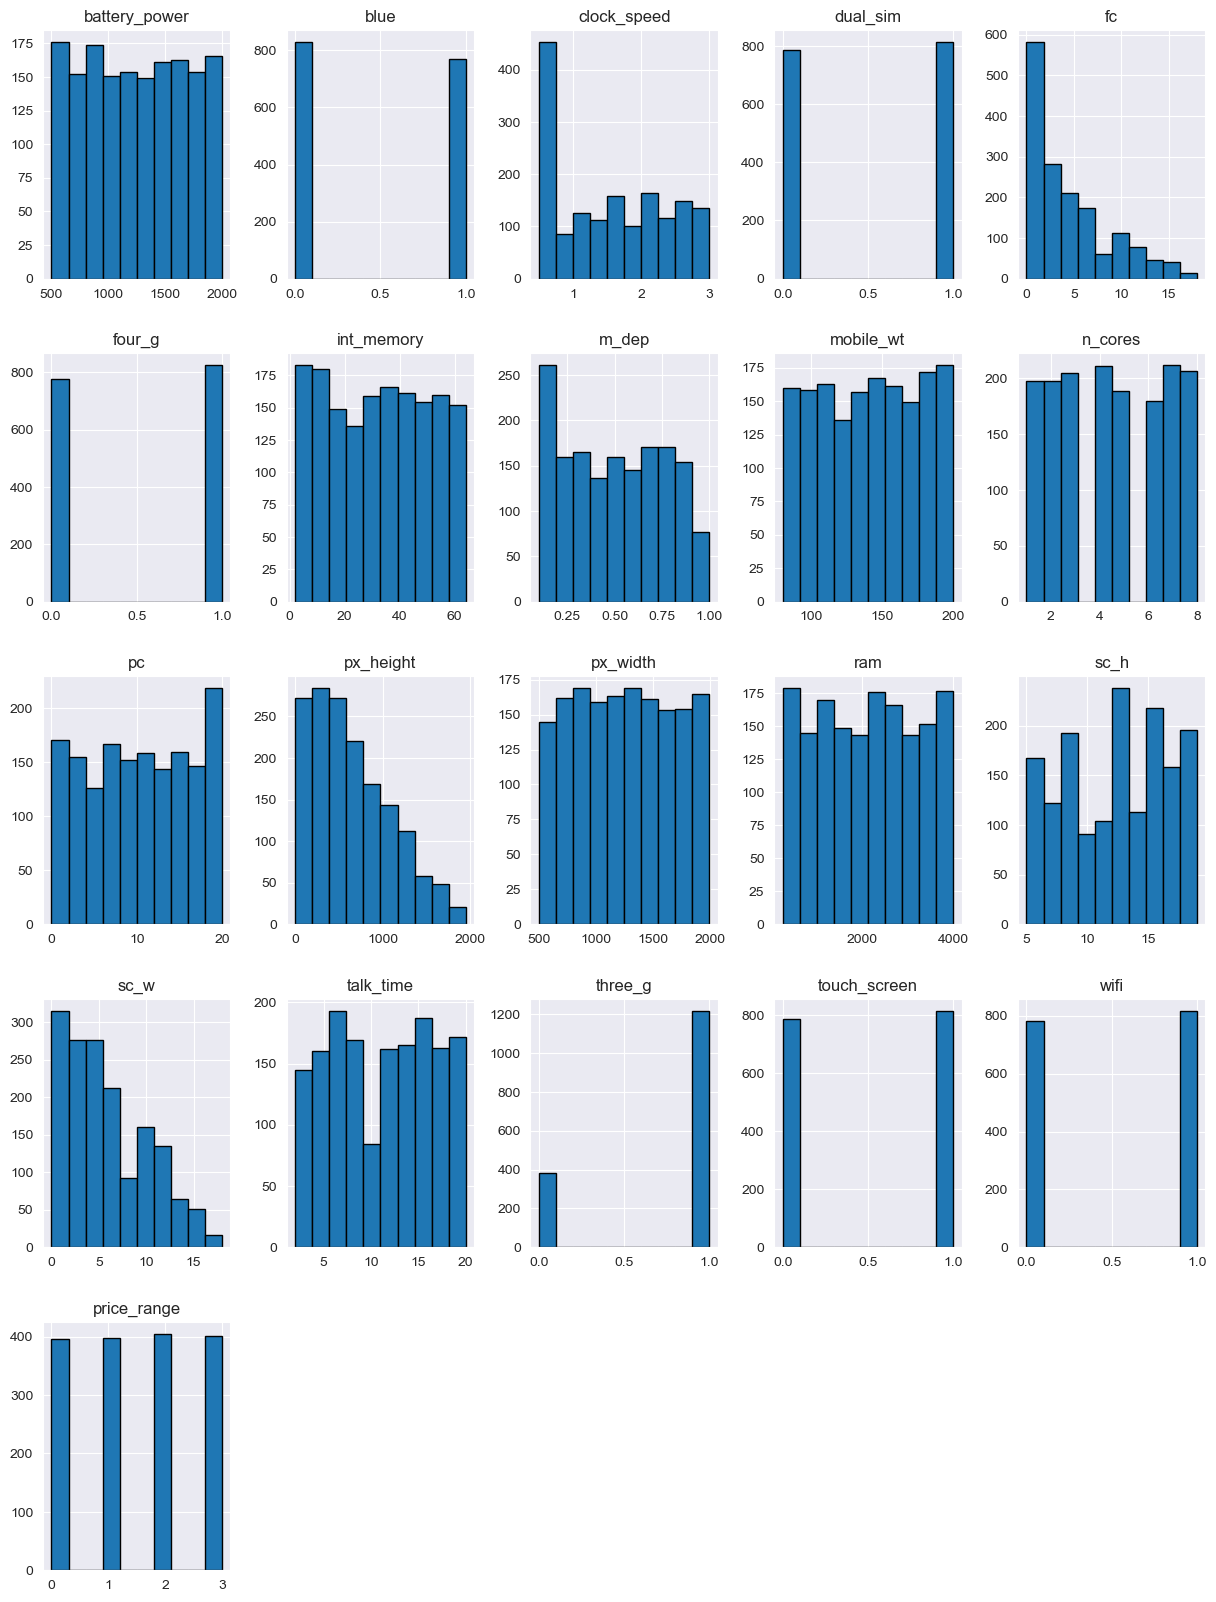

In [24]:
#create histogram
df.hist(bins = 10, edgecolor = 'black', figsize = (15, 20))

#add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

#show plot
plt.show()

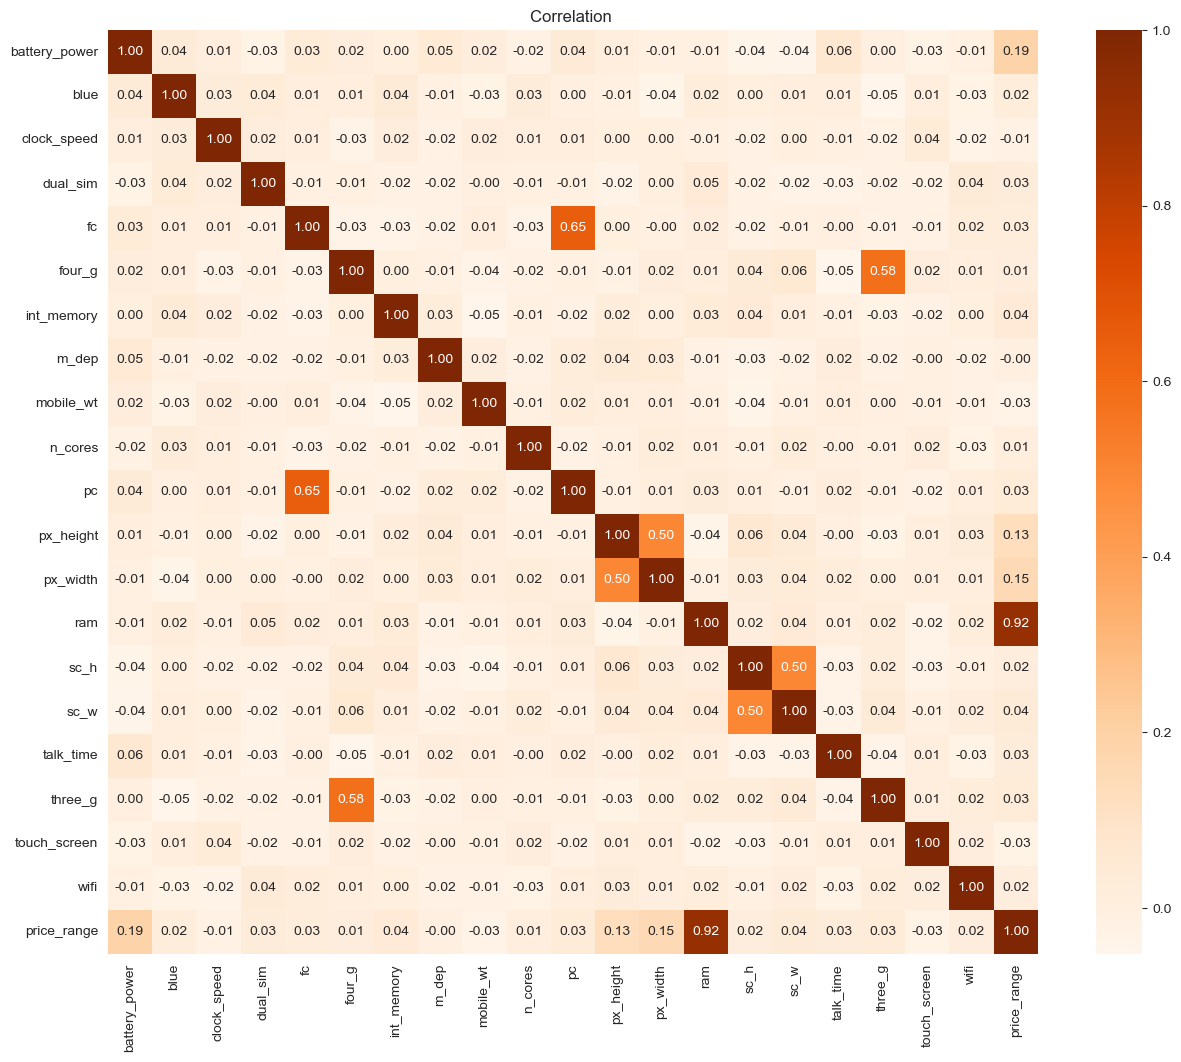

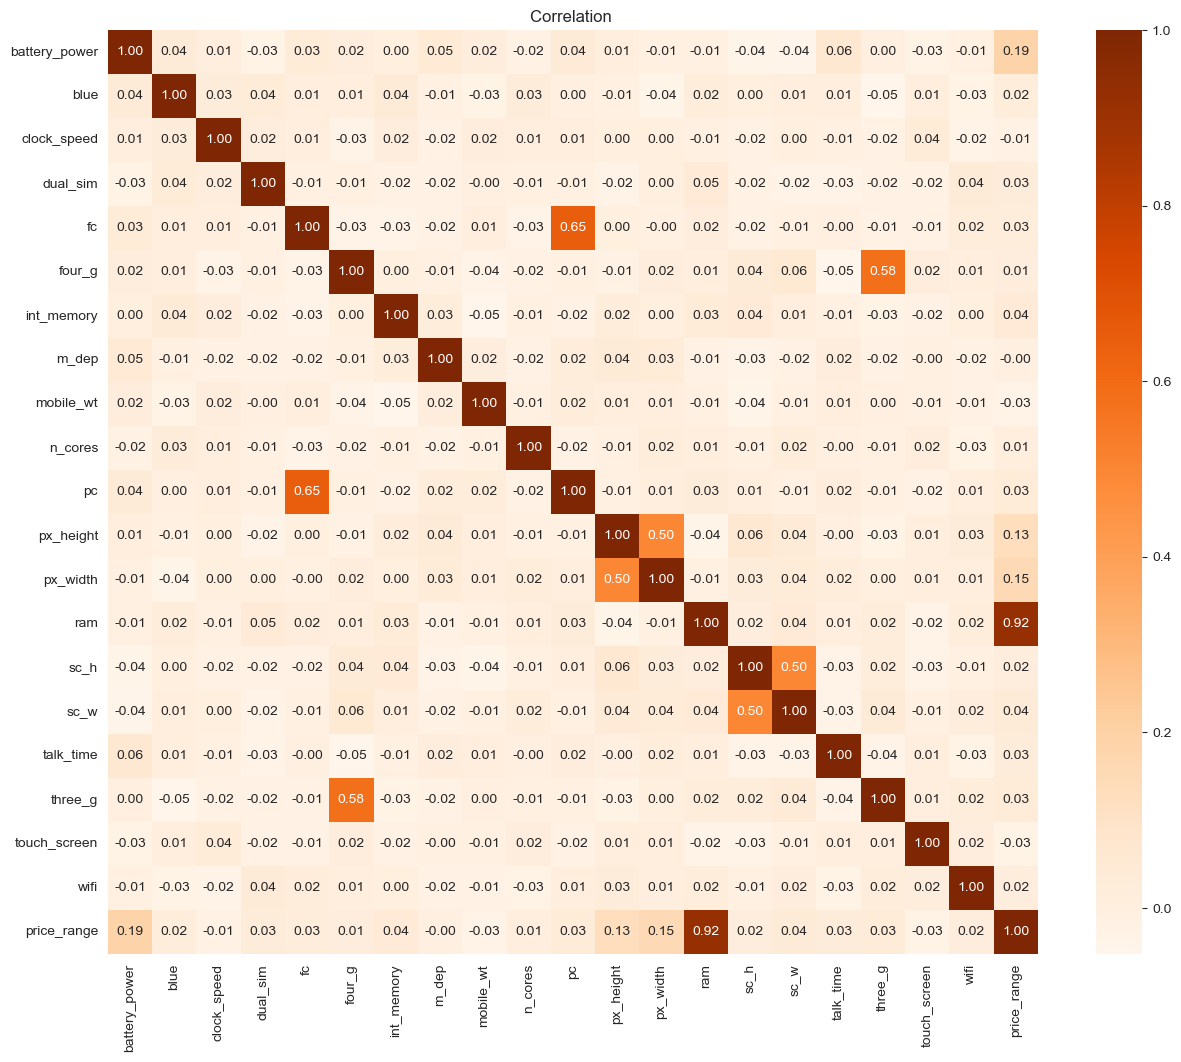

In [26]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Oranges', annot=True, fmt=".2f")
r.set_title("Correlation ")

plt.show()

In [27]:
#price range correlation

corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.918173
battery_power    0.193357
px_width         0.153258
px_height        0.129838
int_memory       0.043335
sc_w             0.039005
pc               0.033904
three_g          0.031665
dual_sim         0.026777
talk_time        0.026360
fc               0.025281
blue             0.021512
sc_h             0.019923
wifi             0.015549
four_g           0.014371
n_cores          0.005925
m_dep           -0.000698
clock_speed     -0.013318
touch_screen    -0.028665
mobile_wt       -0.032266
Name: price_range, dtype: float64

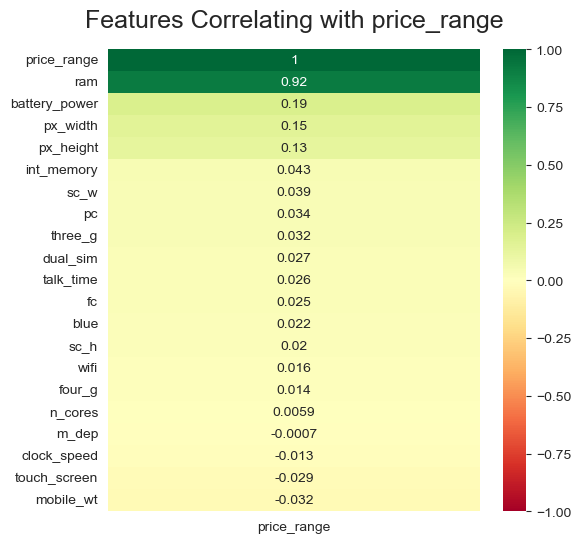

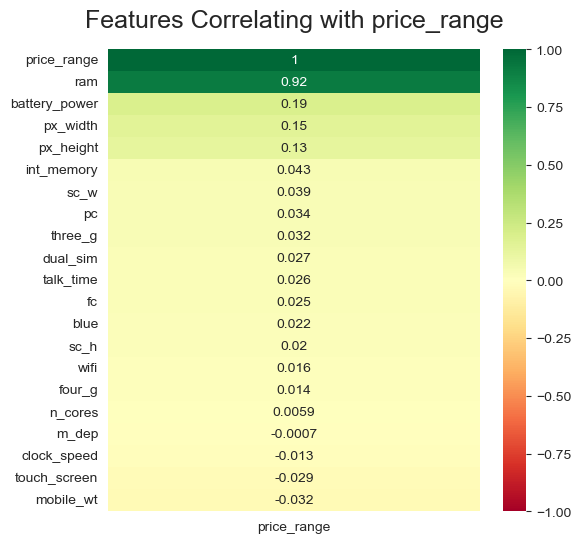

In [29]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['price_range']].sort_values(by='price_range', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Features Correlating with price_range', fontdict={'fontsize':18}, pad=16);

plt.show()

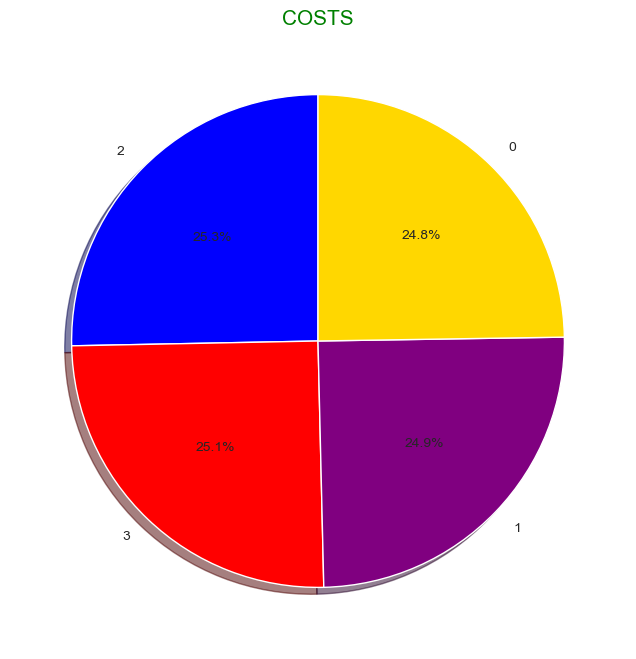

In [30]:
labels = df["price_range"].value_counts().index
sizes = df["price_range"].value_counts()
colors = ['blue', 'red', 'purple', 'gold', 'lime', 'teal']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

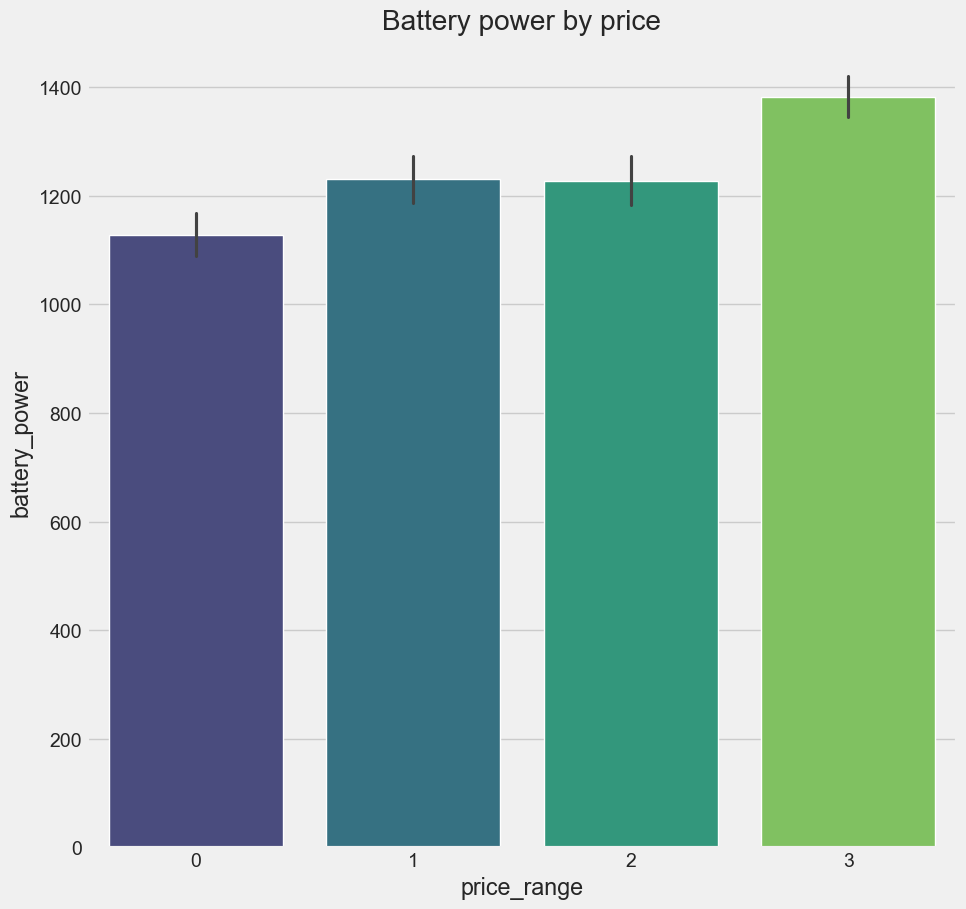

In [31]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.title("Battery power by price")
sns.set(font_scale=1)
sns.barplot(data=df, y="battery_power",x="price_range",palette="viridis")
plt.show()

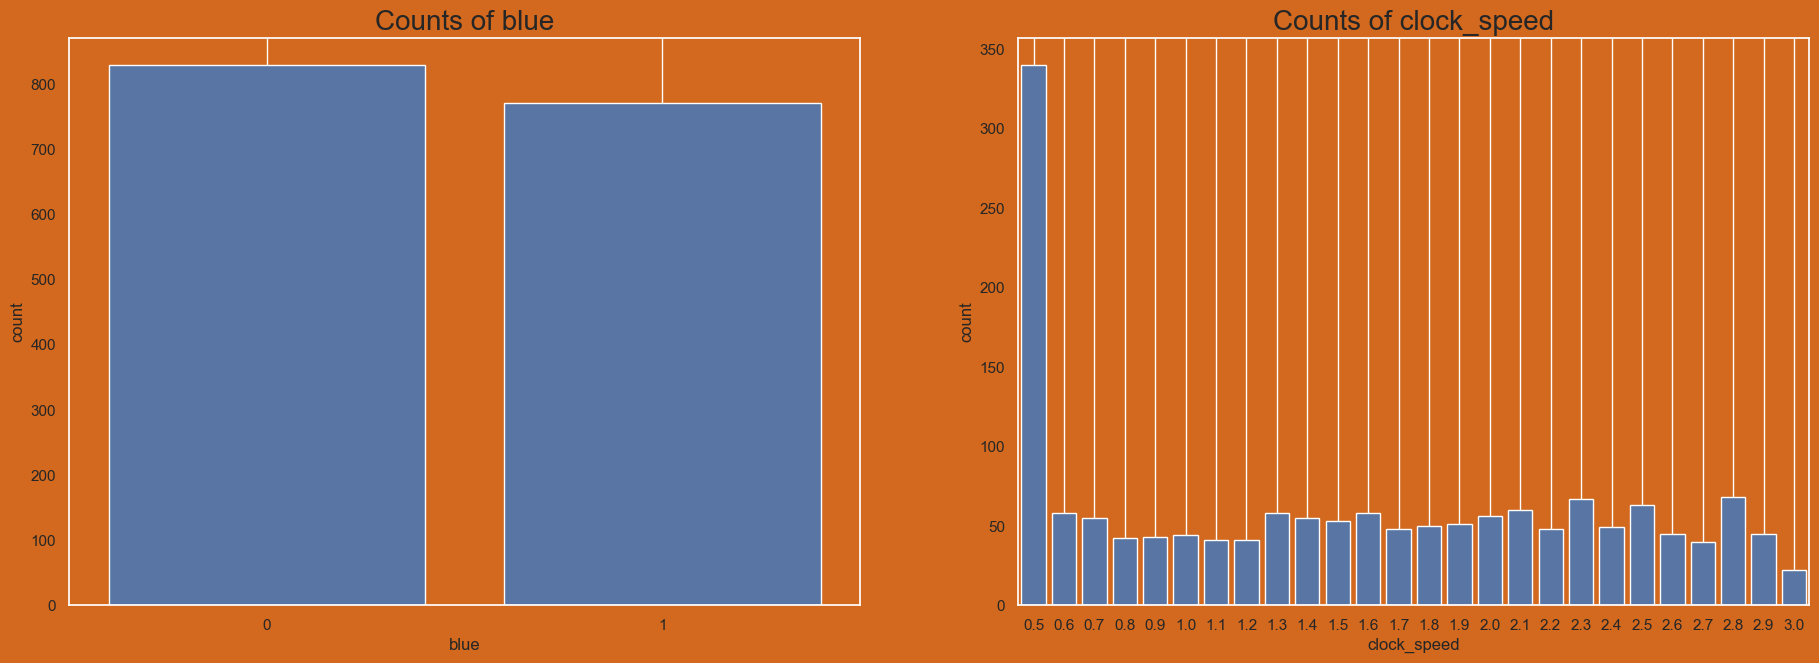

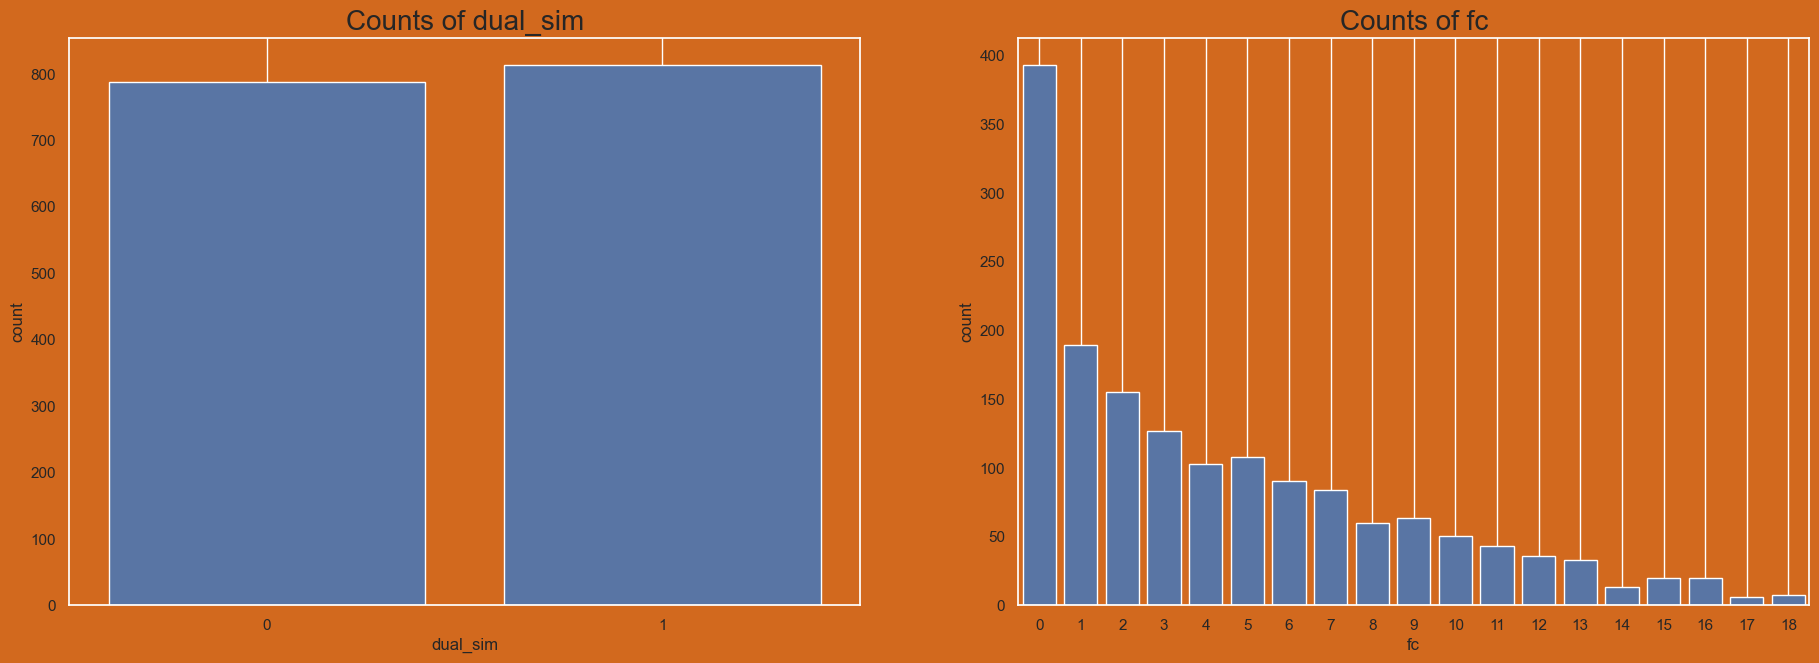

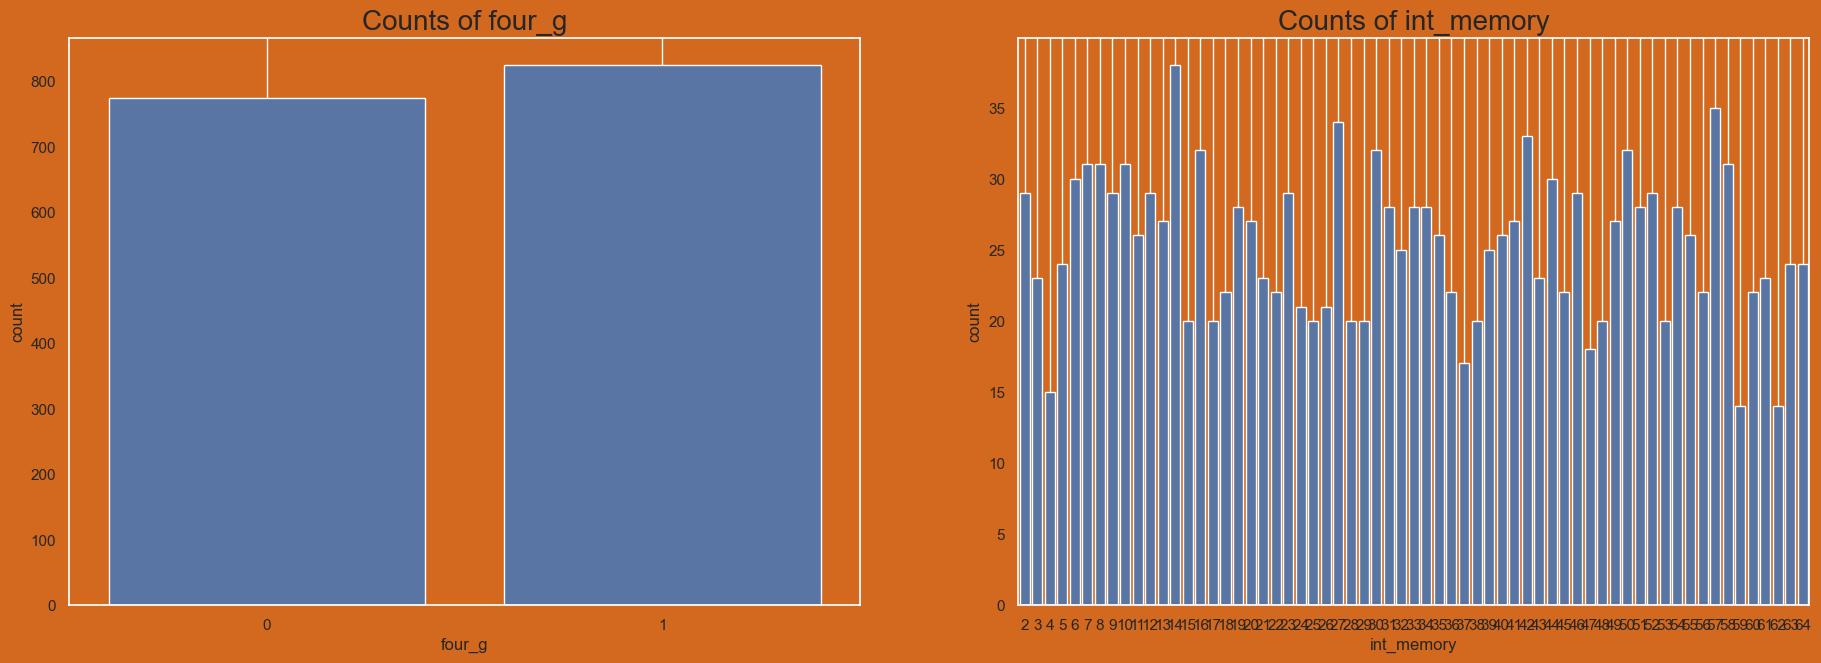

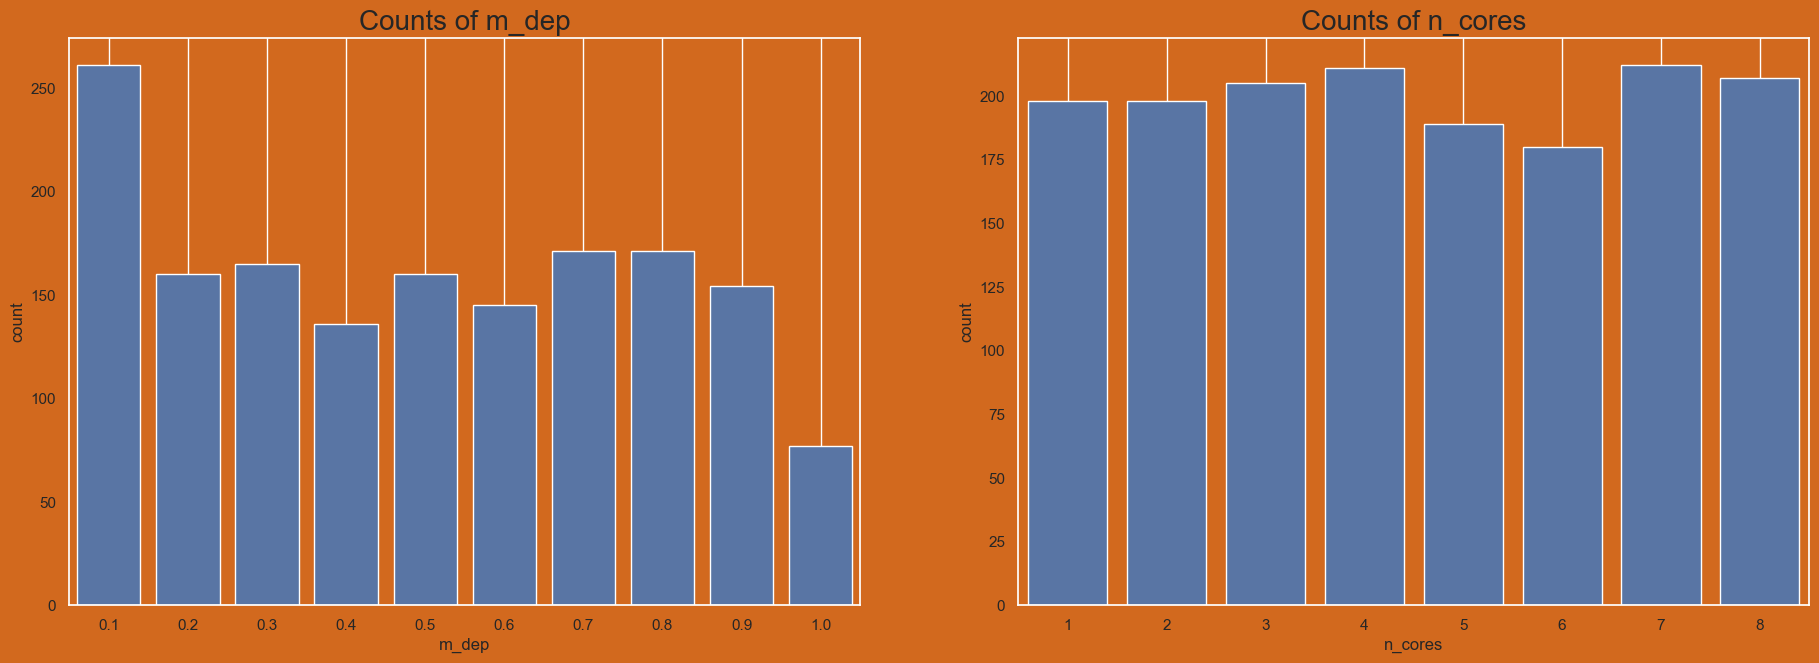

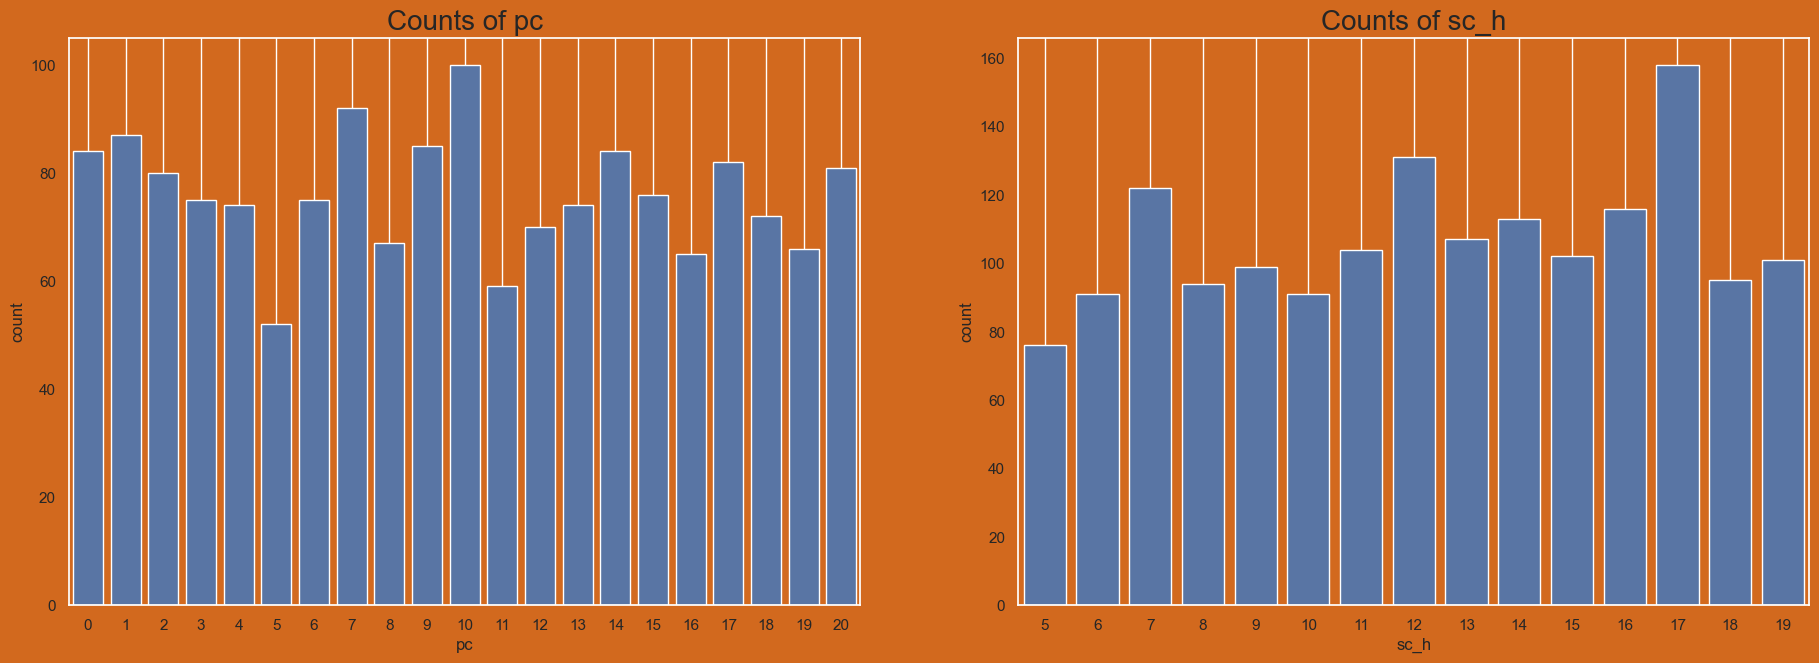

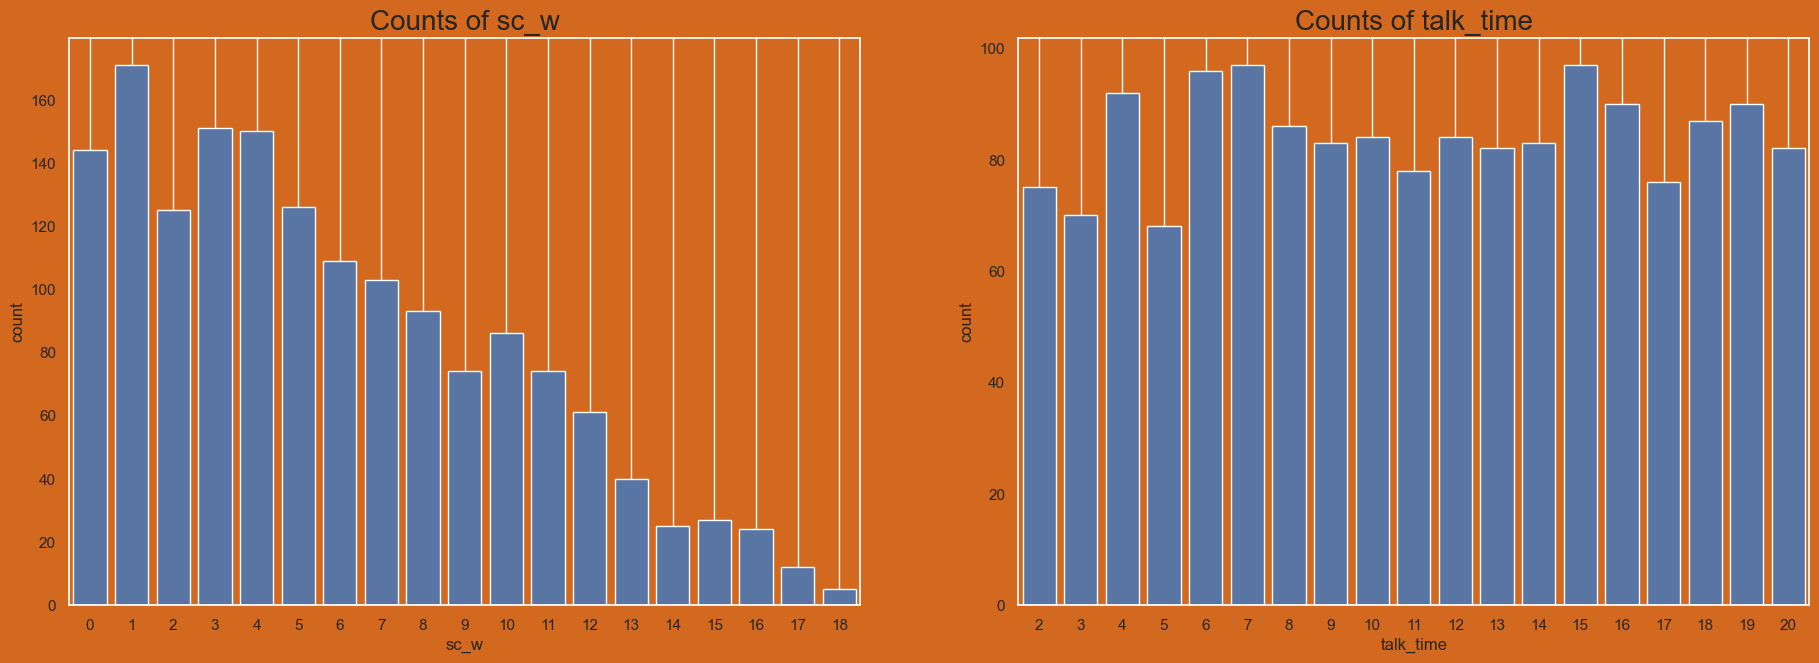

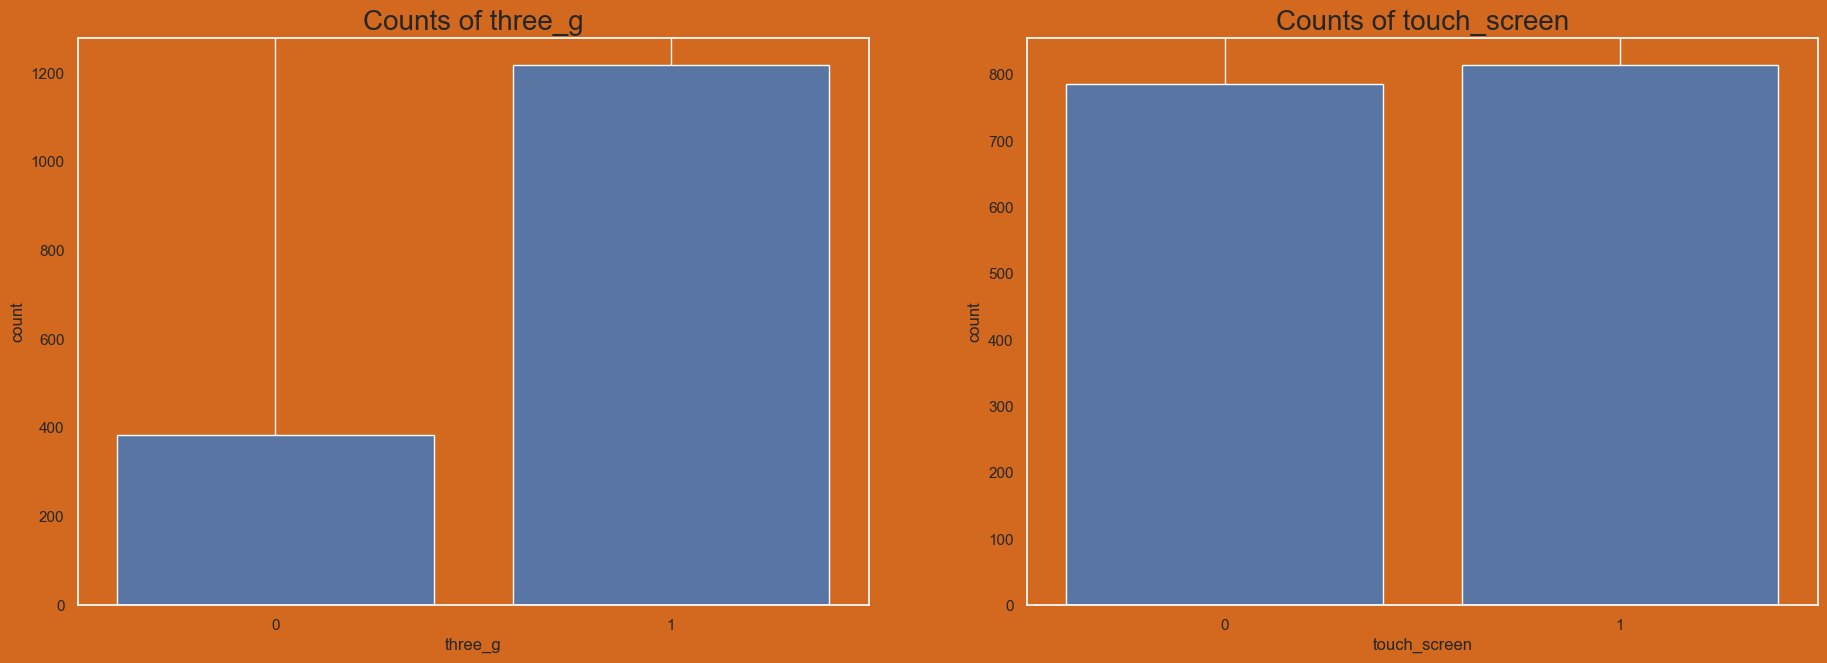

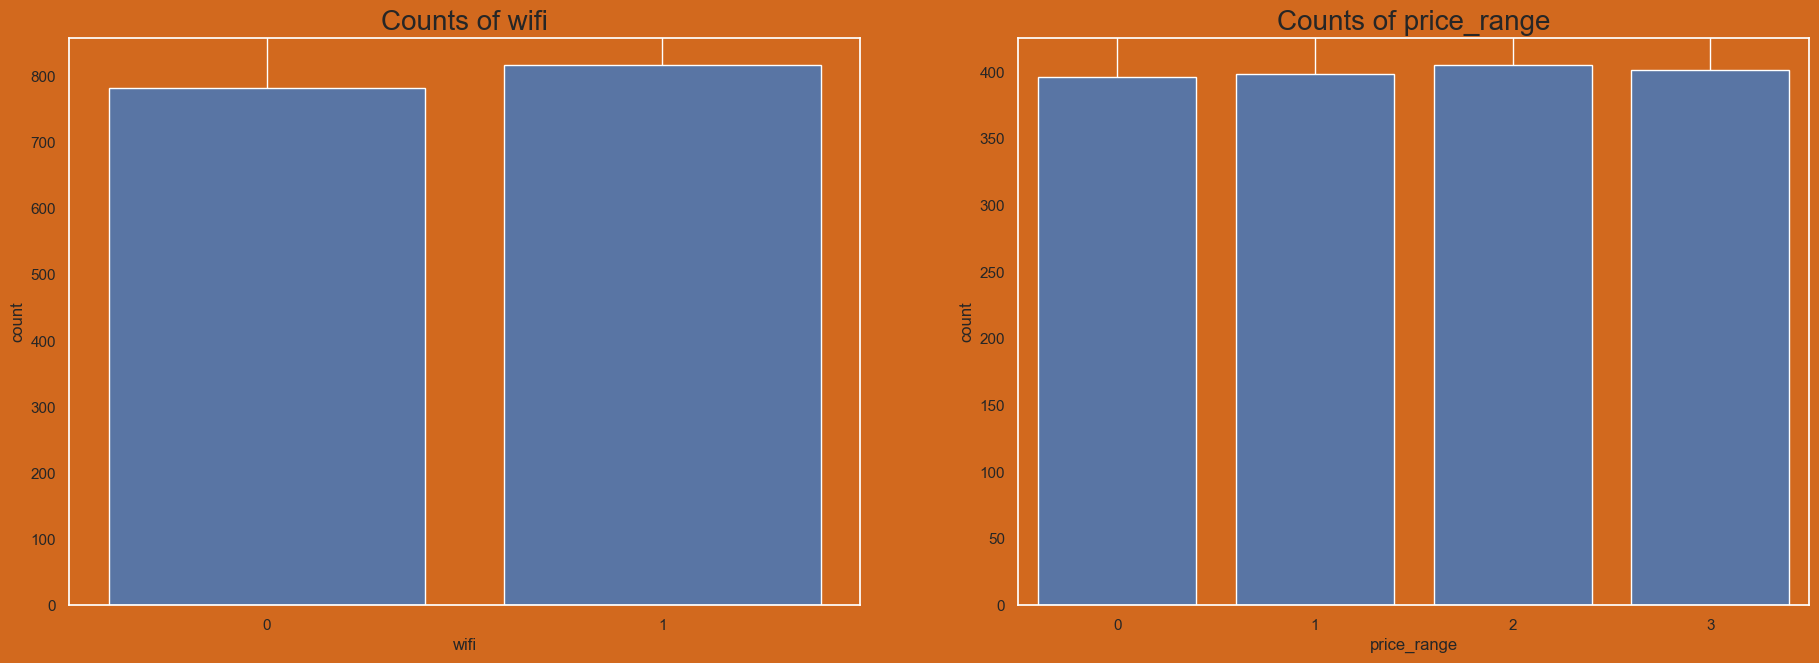

In [32]:
count_plot_columns = list (df.drop (['battery_power' , 'mobile_wt' , 'px_height', 'px_width' , 'ram'] , axis = 1))
i =  0

while i < len(count_plot_columns):
    fig = plt.figure(figsize = (20, 7), facecolor='chocolate')
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=count_plot_columns[i], data=df)
    plt.title(f'Counts of {count_plot_columns[i]}', fontsize=20)  
    plt.grid ()
    plt.gca().set_facecolor('chocolate')
    i += 1

    if i < len(count_plot_columns):
        plt.subplot(1, 2, 2)
        sns.countplot(x=count_plot_columns[i], data=df)
        plt.title(f'Counts of {count_plot_columns[i]}', fontsize=20) 
        plt.grid ()
        plt.gca().set_facecolor('chocolate')
        i += 1

plt.show()

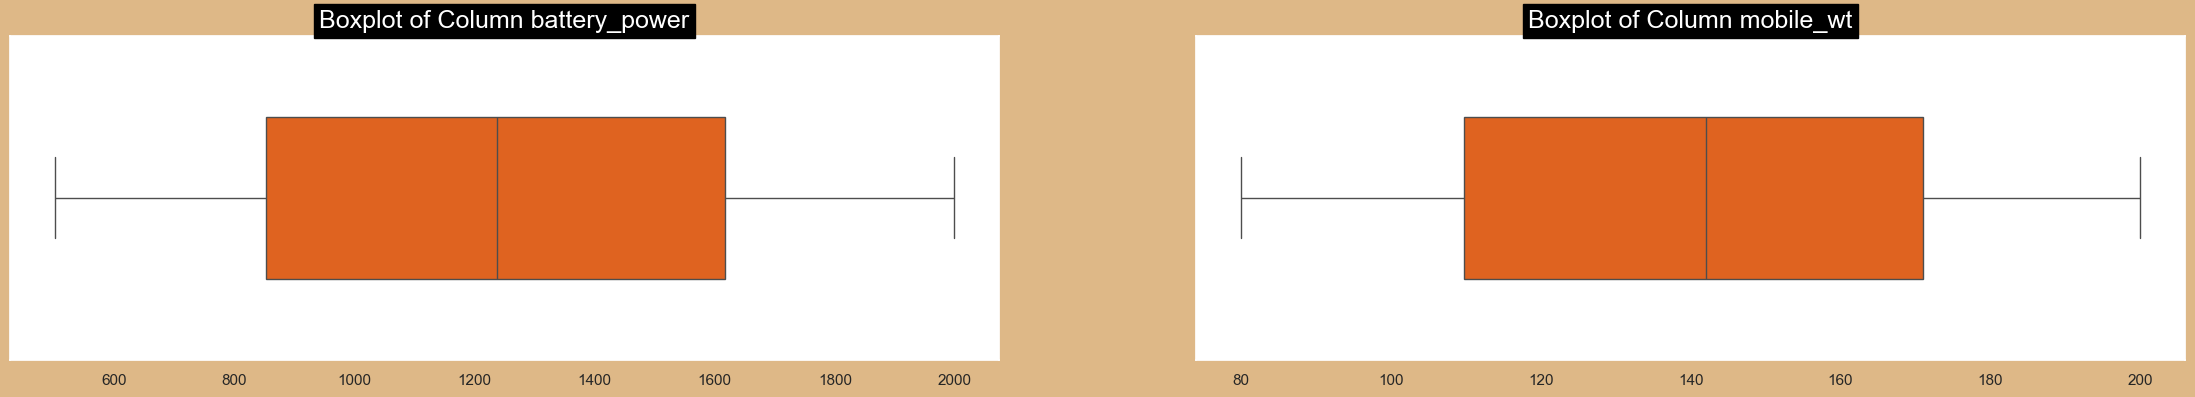

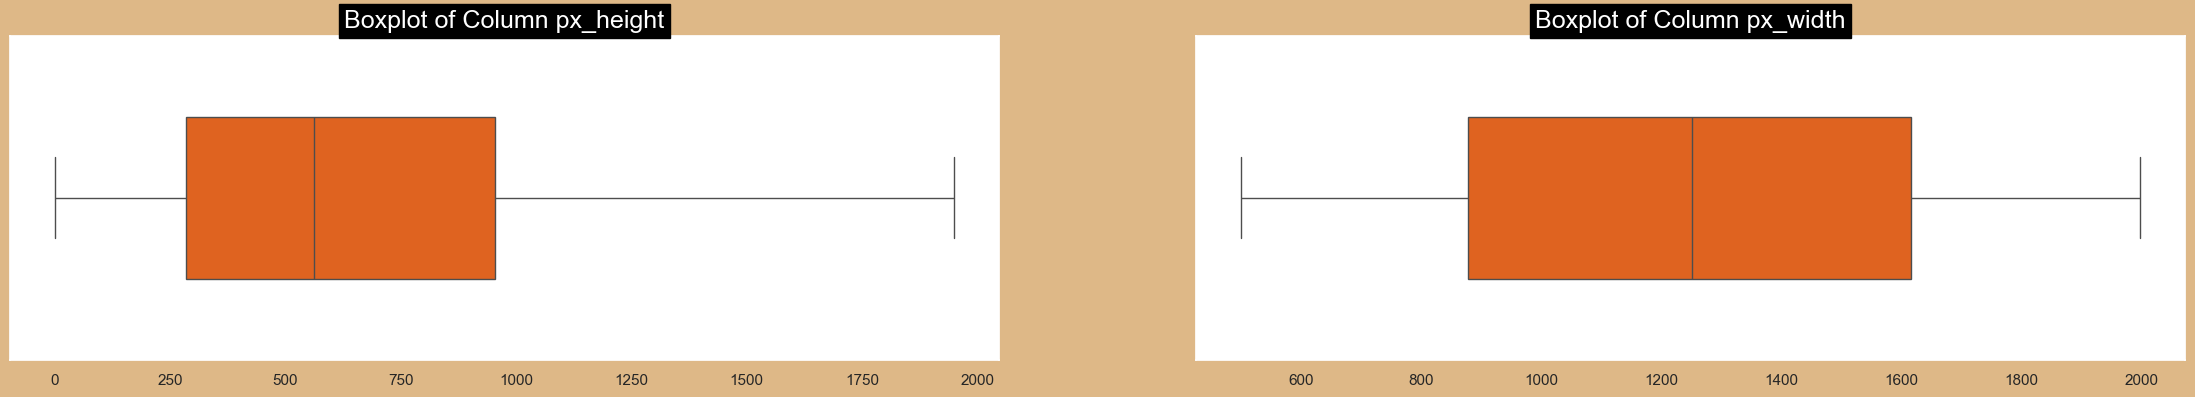

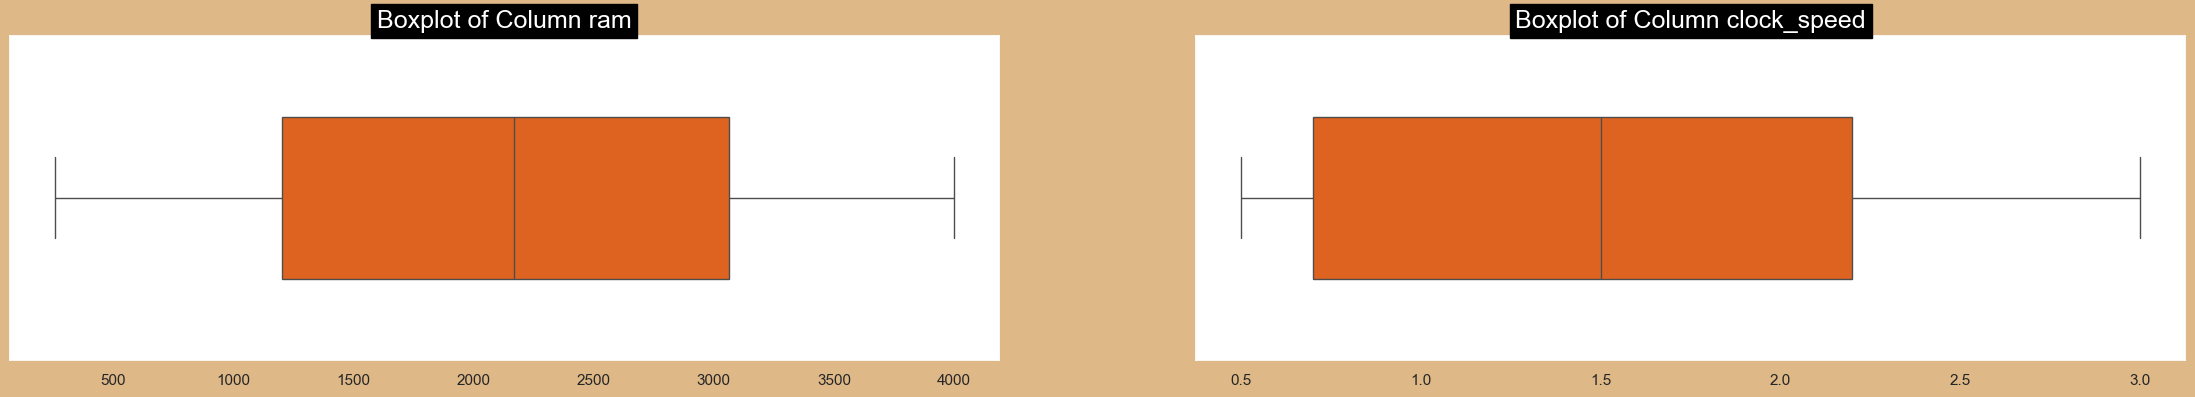

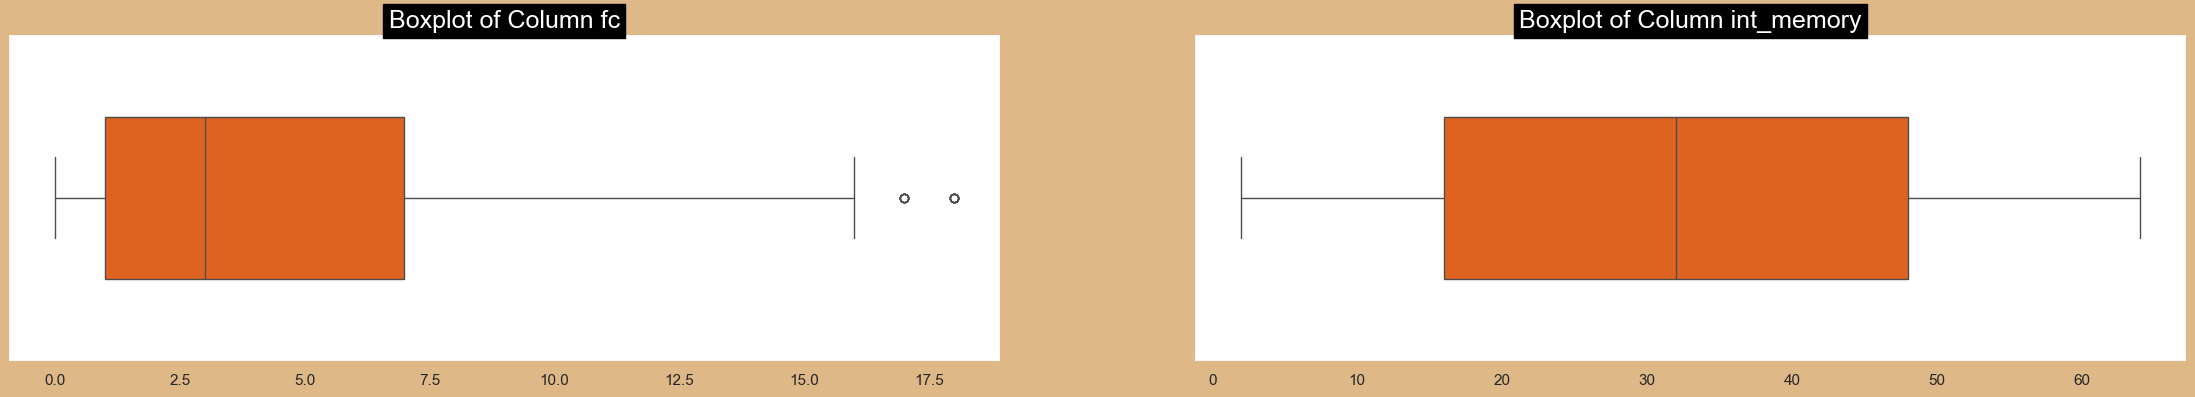

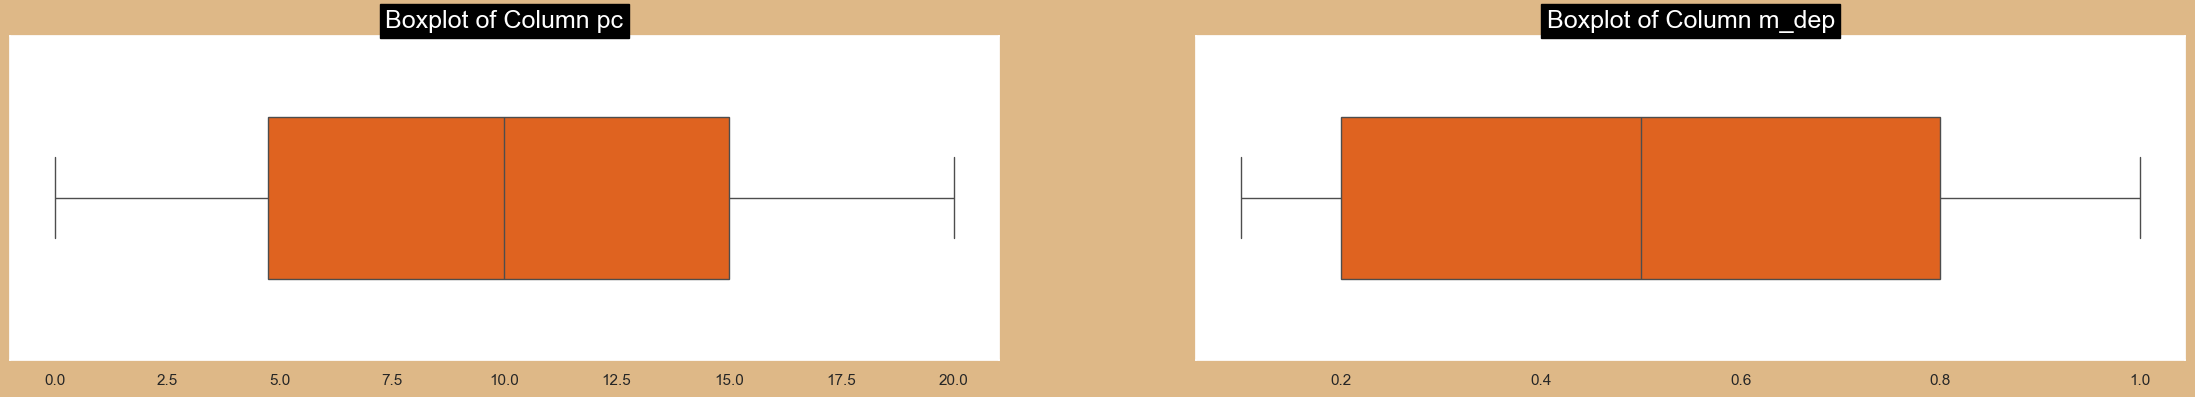

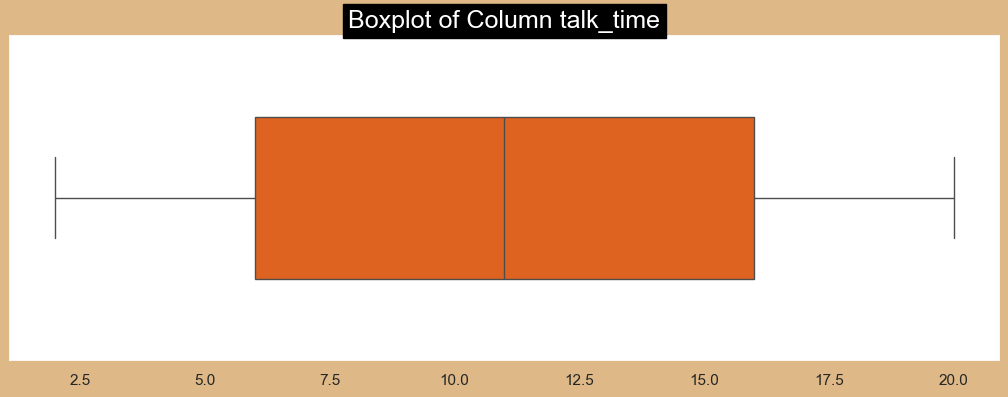

In [33]:
df_box = df[['battery_power' , 'mobile_wt' , 'px_height', 'px_width' , 'ram' , 'clock_speed' , 'fc' , 'int_memory' , 'pc' , 'm_dep' , 'talk_time']].columns
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='burlywood')
    
    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('white')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('white')
        plt.grid()
        i += 1

    plt.show()

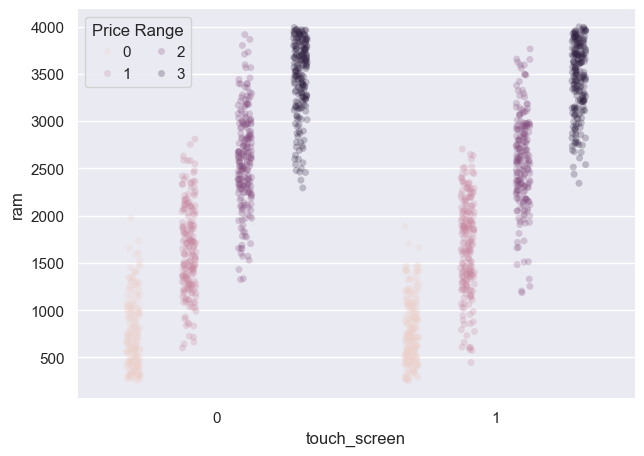

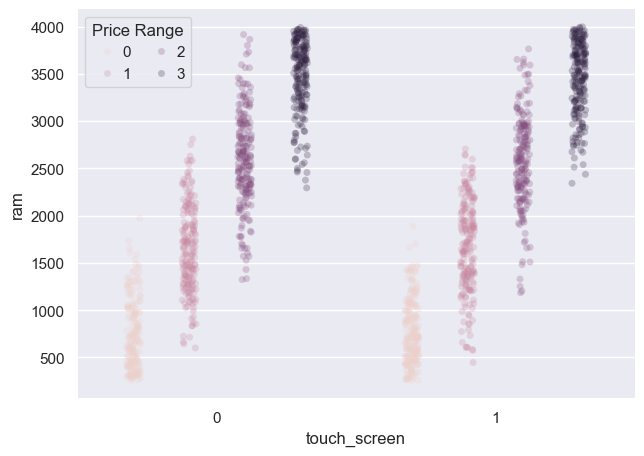

In [35]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=data, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True);

plt.show()

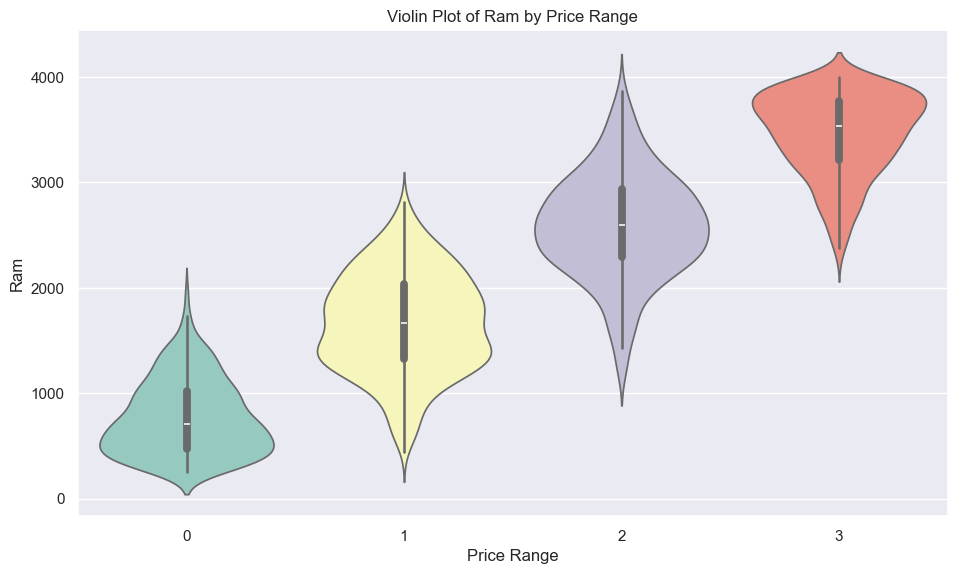

In [36]:
#violin plot of Ram by price_range

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'ram', data = df, palette = 'Set3')
plt.title('Violin Plot of Ram by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

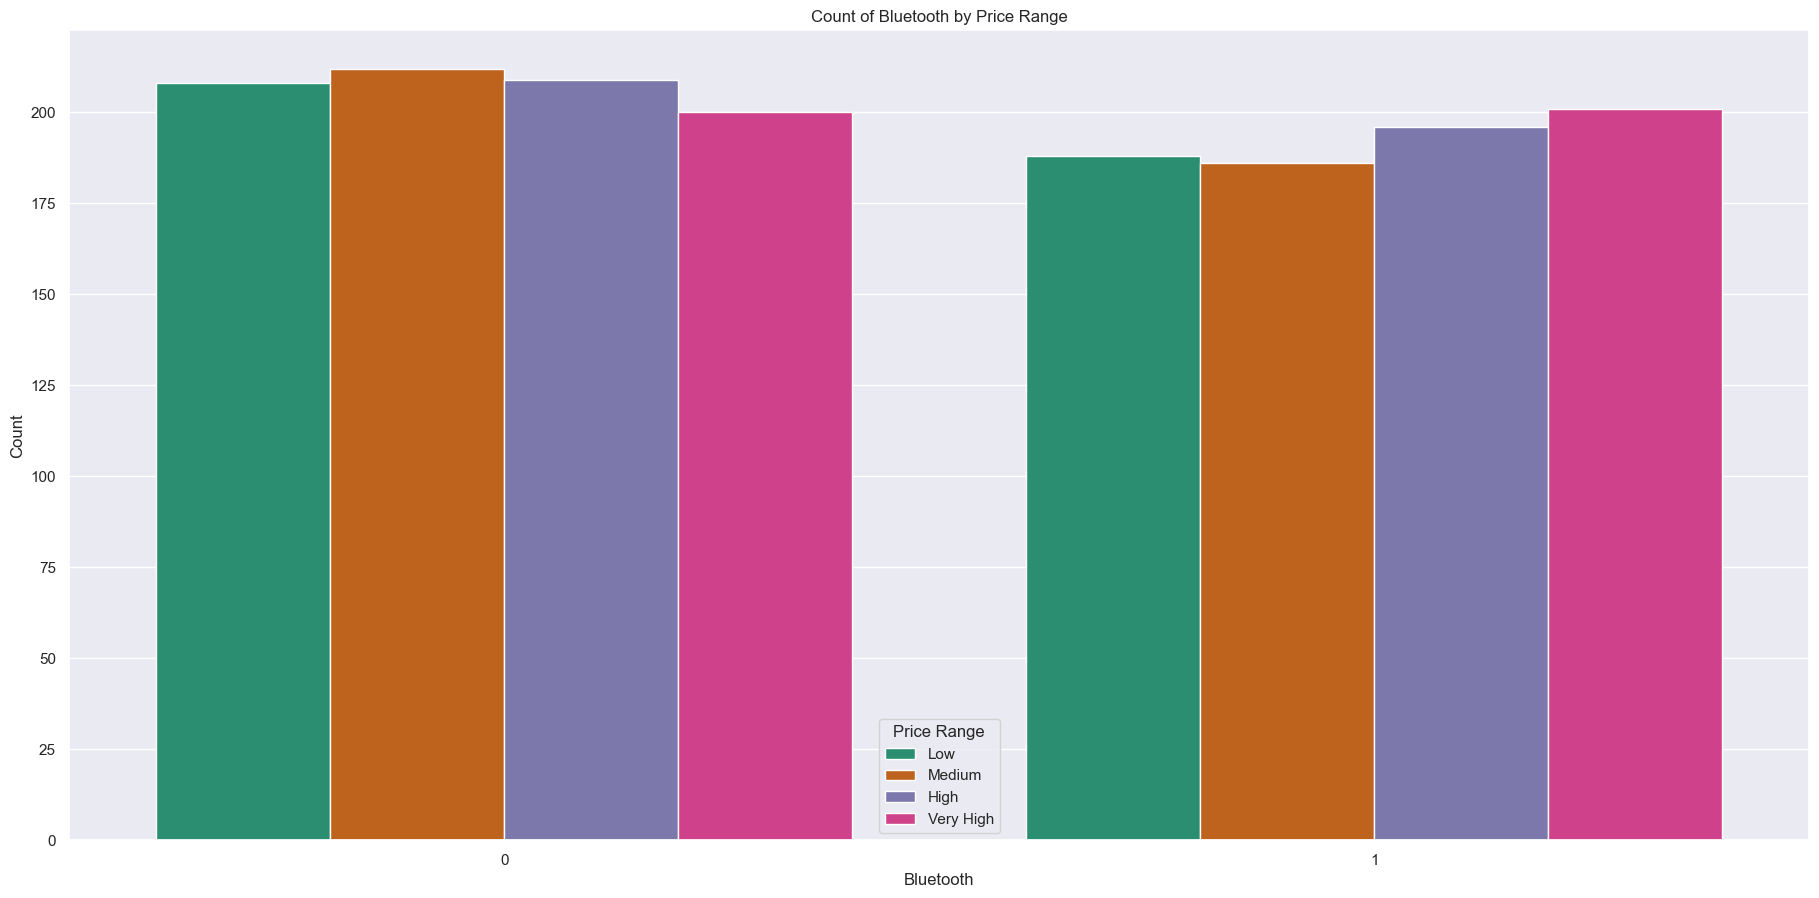

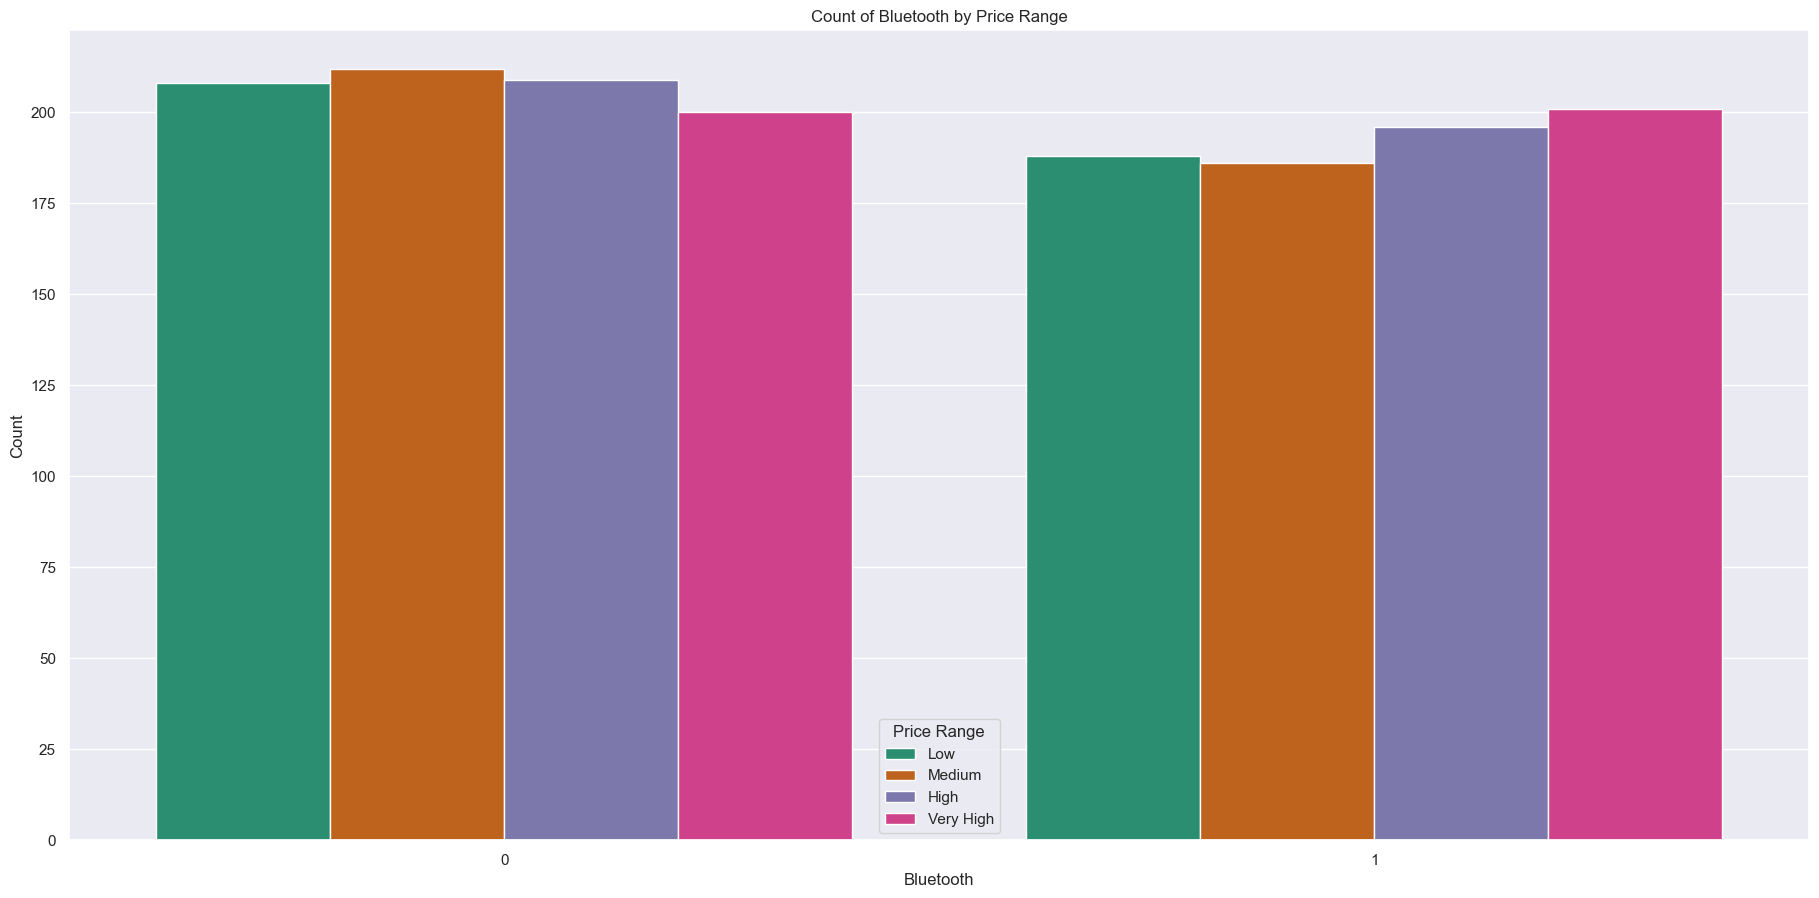

In [38]:
#count of Bluetooth

plt.figure(figsize = (20, 10))
sns.countplot(x = 'blue', hue = 'price_range', data = df, palette = 'Dark2')
plt.title(f'Count of Bluetooth by Price Range')
plt.xlabel('Bluetooth')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High']);
plt.show()

# Model Creating and Training

In [39]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

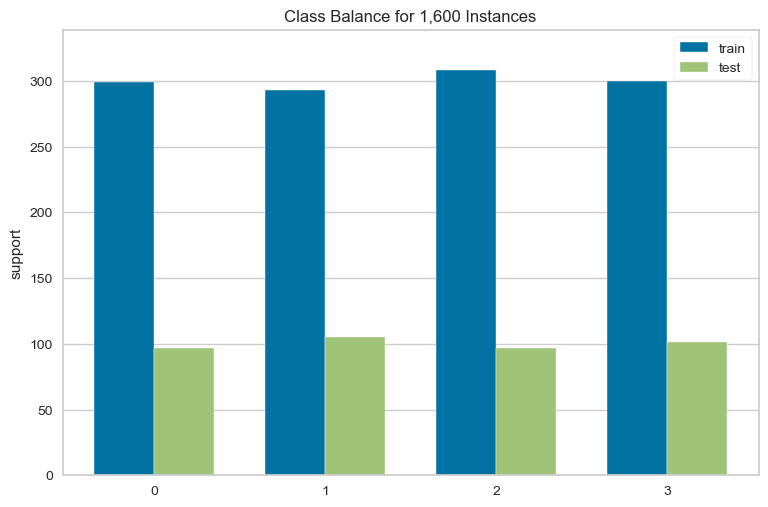

In [40]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2, 3])
visualizer.fit(y_train, y_test)
visualizer.poof();

## SVM

### SVM Baseline Model

In [41]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9525
test accuracy: 0.96


### SVM GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]  
kernel = ["linear", "rbf", "poly", "sigmoid"] 
gamma = ["scale", "auto", 0.1, 0.01, 0.001, 0.0001, 1, 2]  
decision_function_shape = ["ovo", "ovr"] 

In [43]:
svm=SVC(random_state=42)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9591666666666667
best param:  {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 2, 'kernel': 'poly'}


### SVM Cross Validation

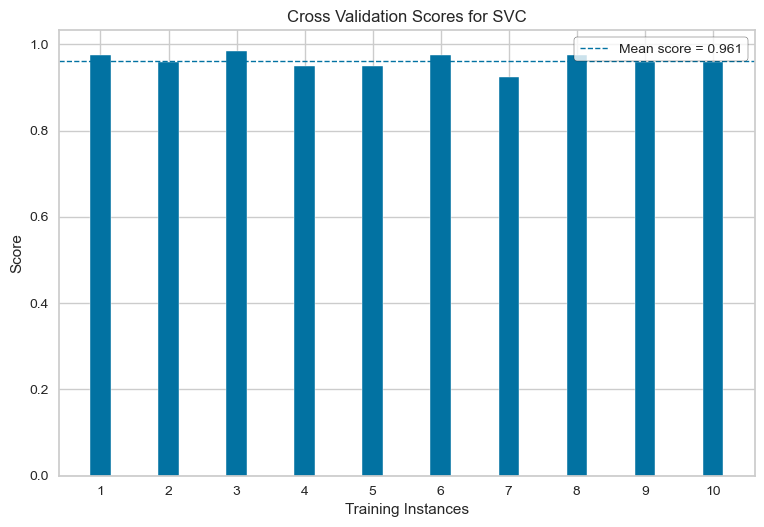

In [44]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(C=10,decision_function_shape="ovo", gamma="scale", kernel="poly",random_state=42), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_train, y_train)
oz.poof();

### SVM Modeling

In [45]:
svm_model=SVC(C=10, decision_function_shape="ovo", gamma="scale",kernel="poly", random_state=42)
svm_model.fit(x_train, y_train)
print("train_accuracy:",svm_model.score(x_train,y_train))
print("test_accuracy: ", svm_model.score(x_test,y_test))

train_accuracy: 0.9708333333333333
test_accuracy:  0.9725


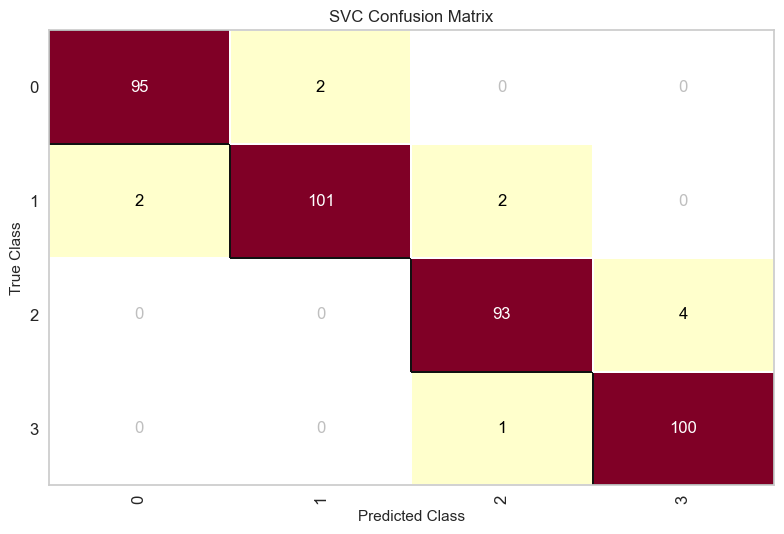

In [46]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof();

In [47]:
y_pred= svm_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9725
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        97
           1       0.98      0.96      0.97       105
           2       0.97      0.96      0.96        97
           3       0.96      0.99      0.98       101

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## Random Forest

### RF Baseline Model

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

rf_train_accuracy = rf_model.score(x_train, y_train)
rf_test_accuracy = rf_model.score(x_test, y_test)

print("Random Forest Train Accuracy:", rf_train_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.86


### RF Gridsearch

In [49]:
from sklearn.model_selection import GridSearchCV

n_estimators = [50, 100, 200, 300, 500]  
max_depth = [None, 10, 20, 30, 40]  
min_samples_split = [2, 5, 10]  
min_samples_leaf = [1, 2, 4]  
bootstrap = [True, False]  

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=0, n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best params:", grid_rf.best_params_)

Best score: 0.8924999999999998
Best params: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


### RF Cross Validation

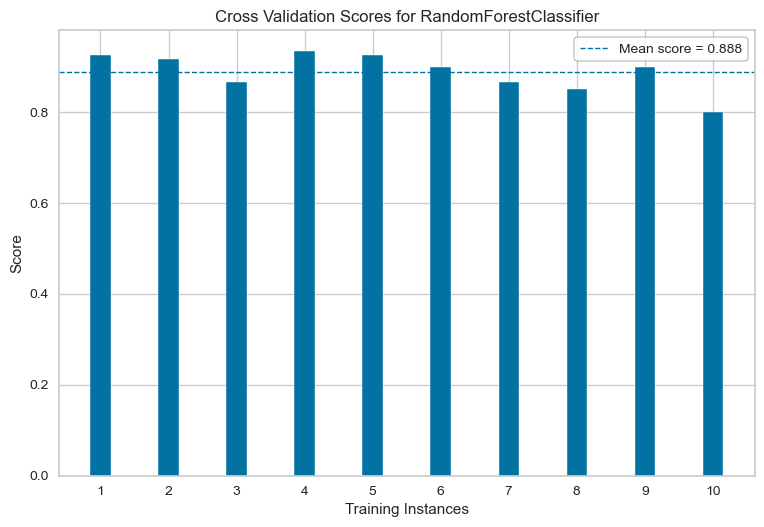

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    RandomForestClassifier(
        n_estimators=500, 
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=1,
        bootstrap=False,
        random_state=42
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(x_train, y_train)
oz.poof();


### RF Modeling

In [52]:
rf_model= RandomForestClassifier(n_estimators= 500, max_depth=None, 
                                 min_samples_split=5,min_samples_leaf=1, 
                                 bootstrap=False, 
                                 random_state=42)

rf_model.fit(x_train, y_train)

print("train_accuracy:", rf_model.score(x_train,y_train))
print("test_accuracy: ", rf_model.score(x_test,y_test))

train_accuracy: 1.0
test_accuracy:  0.86


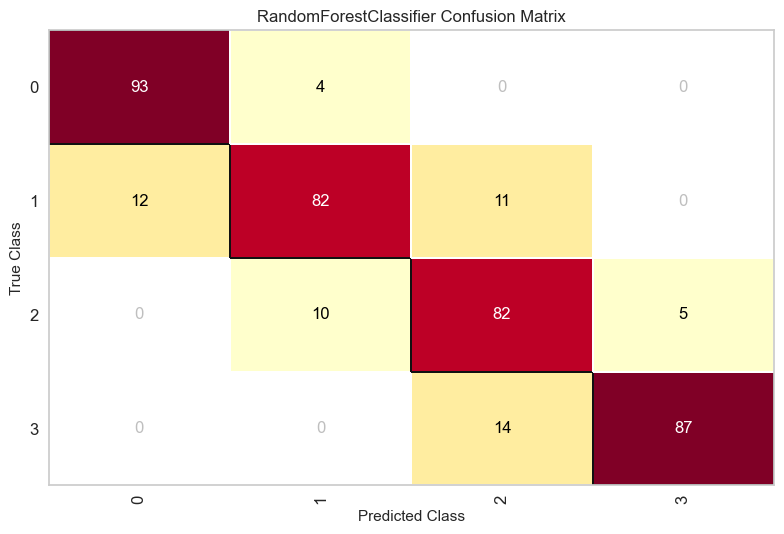

In [53]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
cm = ConfusionMatrix(
    rf_model, classes=[0,1,2,3]
)

cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof();

In [54]:
y_pred= rf_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        97
           1       0.85      0.78      0.82       105
           2       0.77      0.85      0.80        97
           3       0.95      0.86      0.90       101

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



## XGBoost

### XGBoost Baseline Model

In [55]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(x_train, y_train)

xgb_train_accuracy = xgb_model.score(x_train, y_train)
xgb_test_accuracy = xgb_model.score(x_test, y_test)

print("XGBoost Train Accuracy:", xgb_train_accuracy)
print("XGBoost Test Accuracy:", xgb_test_accuracy)

XGBoost Train Accuracy: 1.0
XGBoost Test Accuracy: 0.895


### XGBoost Gridsearch

In [56]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 2, 3]
}

In [57]:
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                        param_grid=param_grid, 
                        cv=5, 
                        scoring='accuracy', 
                        verbose=0, 
                        n_jobs=-1)

grid_xgb.fit(x_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best params:", grid_xgb.best_params_)

Best score: 0.9158333333333333
Best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


### XGBoost Cross Validation

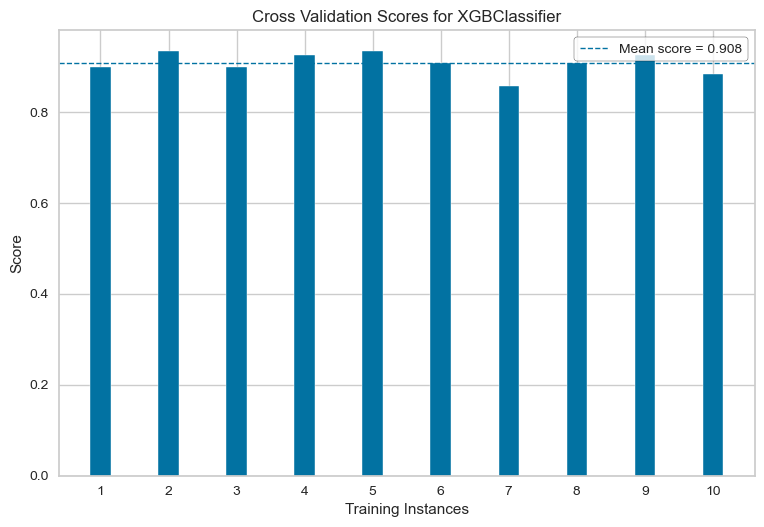

In [58]:
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    XGBClassifier(
       colsapmle_bytree = 0.8, 
        learning_rate= 0.1,
        max_depth= 5,
        n_estimators= 200,
        reg_alpha= 0.5,
        reg_lambda= 1,
        subsample= 0.6,
        random_state=42
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(x_train, y_train)
oz.poof();

### XGBoost Modeling

In [59]:
xgb_model= XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, 
                                 max_depth= 5, n_estimators= 200, 
                                 reg_alpha= 0.5,
                                 reg_lambda= 1,
                                 subsample= 0.6,
                                 random_state=42)

xgb_model.fit(x_train, y_train)

print("train_accuracy:", xgb_model.score(x_train,y_train))
print("test_accuracy: ", xgb_model.score(x_test,y_test))

train_accuracy: 1.0
test_accuracy:  0.89


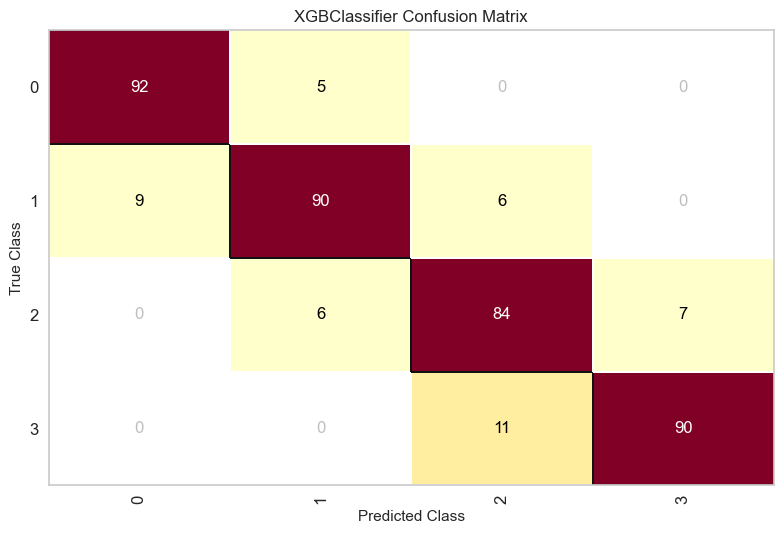

In [60]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(
    xgb_model, classes=[0,1,2,3]
)

cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof();

In [61]:
y_pred= xgb_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        97
           1       0.89      0.86      0.87       105
           2       0.83      0.87      0.85        97
           3       0.93      0.89      0.91       101

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



# Comparison

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_results = []

# SVM Performance
svm_test_pred = svm_model.predict(x_test)
model_results.append({
    'Model': 'SVM',
    'Train Accuracy': svm_model.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, svm_test_pred),
    'Precision': precision_score(y_test, svm_test_pred, average='weighted'),
    'Recall': recall_score(y_test, svm_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, svm_test_pred, average='weighted')
})

# Random Forest Performance
rf_test_pred = rf_model.predict(x_test)
model_results.append({
    'Model': 'Random Forest',
    'Train Accuracy': rf_model.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, rf_test_pred),
    'Precision': precision_score(y_test, rf_test_pred, average='weighted'),
    'Recall': recall_score(y_test, rf_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, rf_test_pred, average='weighted')
})

# XGBoost Performance
xgb_test_pred = xgb_model.predict(x_test)
model_results.append({
    'Model': 'XGBoost',
    'Train Accuracy': xgb_model.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, xgb_test_pred),
    'Precision': precision_score(y_test, xgb_test_pred, average='weighted'),
    'Recall': recall_score(y_test, xgb_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, xgb_test_pred, average='weighted')
})

import pandas as pd
results_df = pd.DataFrame(model_results)
print(results_df)

           Model  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score
0            SVM        0.970833         0.9725   0.972613  0.9725  0.972474
1  Random Forest        1.000000         0.8600   0.863623  0.8600  0.860065
2        XGBoost        1.000000         0.8900   0.890763  0.8900  0.890025


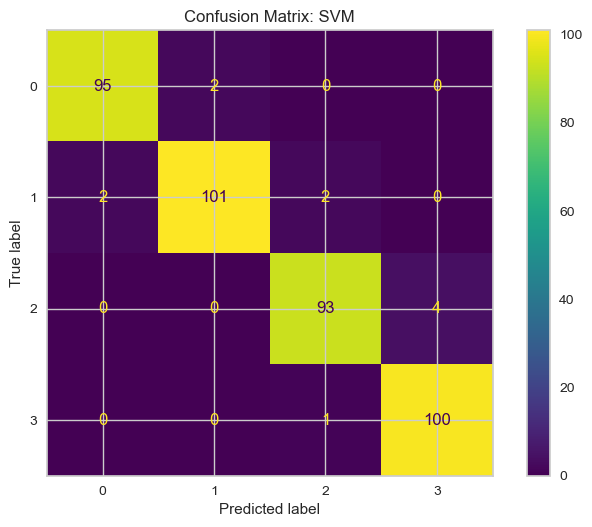

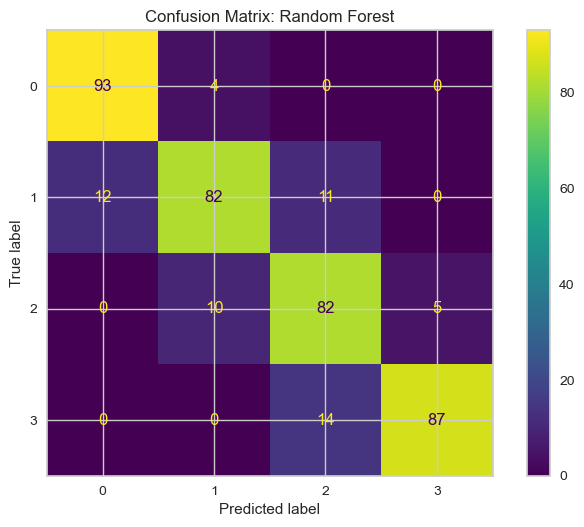

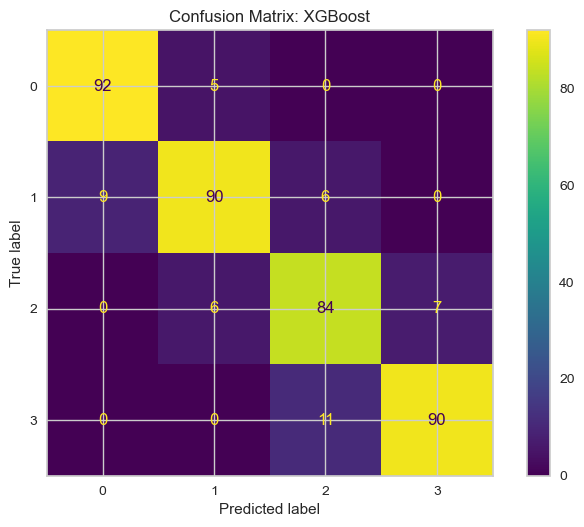

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [('SVM', svm_test_pred), 
          ('Random Forest', rf_test_pred), 
          ('XGBoost', xgb_test_pred)]

for model_name, predictions in models:
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Save

In [66]:
from joblib import dump

dump(svm_model, "svm_model_best.joblib")


['svm_model_best.joblib']

In [67]:
dump(rf_model, "random_forest_best.joblib")

['random_forest_best.joblib']

In [68]:
dump(xgb_model, "xgboost_best.joblib")

['xgboost_best.joblib']